# Problem Statement

## Background

Customer churn, also known as customer attrition, refers to when a customer stops doing business with a company or service. It's a crucial metric in the e-commerce industry as the cost of acquiring a new customer can be significantly higher than retaining an existing one. Therefore, predicting customer churn accurately can help businesses to retain customers by identifying potential churn customers early and offering them incentives to stay.

## Problem Definition: 

Despite the growth of the e-commerce industry, customer churn remains a significant problem. The goal of this project is to predict customer churn in an e-commerce business using a variety of customer-related features. The main problem to solve is to use historical customer data to predict whether a customer will churn or not in the future.

## Objectives

To explore and understand the patterns in the customer data related to churn.
To create a predictive model that can accurately predict customer churn.
To identify the main factors contributing to customer churn.
Data: The data set for this project includes various customer-related features such as tenure, preferred login device, city tier, gender, hours spent on the app, the number of devices registered, satisfaction score, marital status, number of addresses, complaints, order amount hike from last year, coupons used, order count, days since last order, and cashback amount. The target variable is the churn flag which indicates whether a customer has churned or not.

## Methods 

The project will leverage the PyCaret library for benchmarking purposes, with a focus on the top five models generated from PyCaret's output. These models will be further evaluated and optimized for better performance.

## Evaluation Metrics

The performance of the models will be evaluated using appropriate metrics for classification problems such as accuracy, precision, recall, F1 score, and ROC AUC.

## Expected Outcomes

The expected outcome is a robust predictive model that can accurately predict customer churn. The model's insights could be used to develop effective customer retention strategies.

## Challenges and Limitations

Potential challenges include dealing with imbalanced data if the churn rate is significantly low. Furthermore, predictive power might be limited if crucial predictors of churn are not included in the dataset. The project also assumes that the patterns of customer behavior remain consistent over time, which might not always be the case in a rapidly evolving industry like e-commerce.





# Load necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
sns.set_style("white")

import scipy.stats as stats

from pycaret.classification import *

In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_excel("dataset/E Commerce Dataset.xlsx", sheet_name="E Comm")
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# Data Understanding

## Check Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Check Duplicates

In [4]:
data.duplicated().sum()

0

## Check Missing Values

In [5]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Summary Data

In [6]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## Check Unique Value

In [7]:
data.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

## Separate Data into Numerical and Categorical

In [8]:
def classify_variables(data):
    continuous_vars = []
    discrete_vars = []
    nominal_vars = []
    ordinal_vars = []

    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # numerical
            if data[col].nunique() < 10:  # heuristic: if less than 10 unique values, consider it discrete
                print(f'{col} is likely a discrete numerical variable.')
                discrete_vars.append(col)
            else:
                print(f'{col} is likely a continuous numerical variable.')
                continuous_vars.append(col)
        else:  # categorical
            if pd.api.types.is_categorical_dtype(data[col]):  # if the column type is already categorical
                if hasattr(data[col].cat, 'ordered') and data[col].cat.ordered:  # if it's an ordered category
                    print(f'{col} is likely an ordinal categorical variable.')
                    ordinal_vars.append(col)
                else:
                    print(f'{col} is likely a nominal categorical variable.')
                    nominal_vars.append(col)
            else:  # if it's object or something else
                print(f'{col} is likely a nominal categorical variable.')  # default to nominal, as we can't infer order
                nominal_vars.append(col)
                
    return continuous_vars, discrete_vars, nominal_vars, ordinal_vars

continuous_vars, discrete_vars, nominal_vars, ordinal_vars = classify_variables(data)

CustomerID is likely a continuous numerical variable.
Churn is likely a discrete numerical variable.
Tenure is likely a continuous numerical variable.
PreferredLoginDevice is likely a nominal categorical variable.
CityTier is likely a discrete numerical variable.
WarehouseToHome is likely a continuous numerical variable.
PreferredPaymentMode is likely a nominal categorical variable.
Gender is likely a nominal categorical variable.
HourSpendOnApp is likely a discrete numerical variable.
NumberOfDeviceRegistered is likely a discrete numerical variable.
PreferedOrderCat is likely a nominal categorical variable.
SatisfactionScore is likely a discrete numerical variable.
MaritalStatus is likely a nominal categorical variable.
NumberOfAddress is likely a continuous numerical variable.
Complain is likely a discrete numerical variable.
OrderAmountHikeFromlastYear is likely a continuous numerical variable.
CouponUsed is likely a continuous numerical variable.
OrderCount is likely a continuous n

In [9]:
#remove customer ID and churn from continous and discrete variabel

continuous_vars.remove("CustomerID")
discrete_vars.remove("Churn")

In [10]:
def len_variable(var, var_name):
    return f"{var_name} has {len(var)} index data"

print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

Continuous Variable has 8 index data
Discrete Variable has 5 index data
Nominal Variable has 5 index data
Ordinal Variable has 0 index data


## Check Inconsistent Data

In [11]:
#check incosistent data

for col in nominal_vars:
    print(f"Unique value of {col}:\n{data[col].unique()}\n")

Unique value of PreferredLoginDevice:
['Mobile Phone' 'Phone' 'Computer']

Unique value of PreferredPaymentMode:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Unique value of Gender:
['Female' 'Male']

Unique value of PreferedOrderCat:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Unique value of MaritalStatus:
['Single' 'Divorced' 'Married']



In [12]:
# Fix incosistent data
## ideally replacing inconsistent categories be performed after splitting
## for analysis purpose we copy the dataframe and assigned to data_copy
## we used .copy() due to create separate pointer so when we avoid any change values on origin dataframe

data_copy = data.copy()

# Define the mappings for the categories to be replaced
preferred_login_device_mapping = {'Phone': 'Mobile Phone'}
preferred_payment_mode_mapping = {'COD': 'Cash on Delivery', 'CC': 'Credit Card'}
preferred_order_cat_mapping = {'Mobile': 'Mobile Phone'}

# Replace the inconsistent categories
data_copy['PreferredLoginDevice'] = data_copy['PreferredLoginDevice'].replace(preferred_login_device_mapping)
data_copy['PreferredPaymentMode'] = data_copy['PreferredPaymentMode'].replace(preferred_payment_mode_mapping)
data_copy['PreferedOrderCat'] = data_copy['PreferedOrderCat'].replace(preferred_order_cat_mapping)

For analysis purpose we will use data_copy as dataframe to avoid any changes that can affect accross data before splitting

# Exploratory Data Analysis
## Univariate Analysis
### Proportion Customer Churn

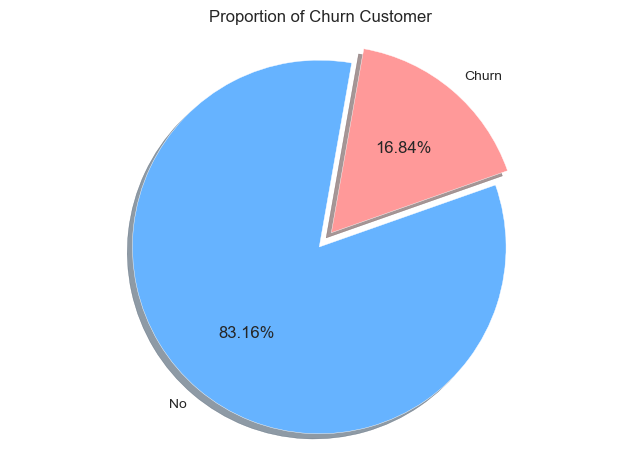

In [13]:
labels = ['No', 'Churn']

churn_data = data_copy['Churn'].value_counts()
my_colors = ['#66b3ff','#ff9999'] # Pastel colors
my_explode = (0, 0.1)
plt.pie(churn_data, labels=labels, autopct='%.2f%%', startangle=80, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Proportion of Churn Customer')
plt.axis('equal')
plt.show()

### Check Distribution of Discrete Data

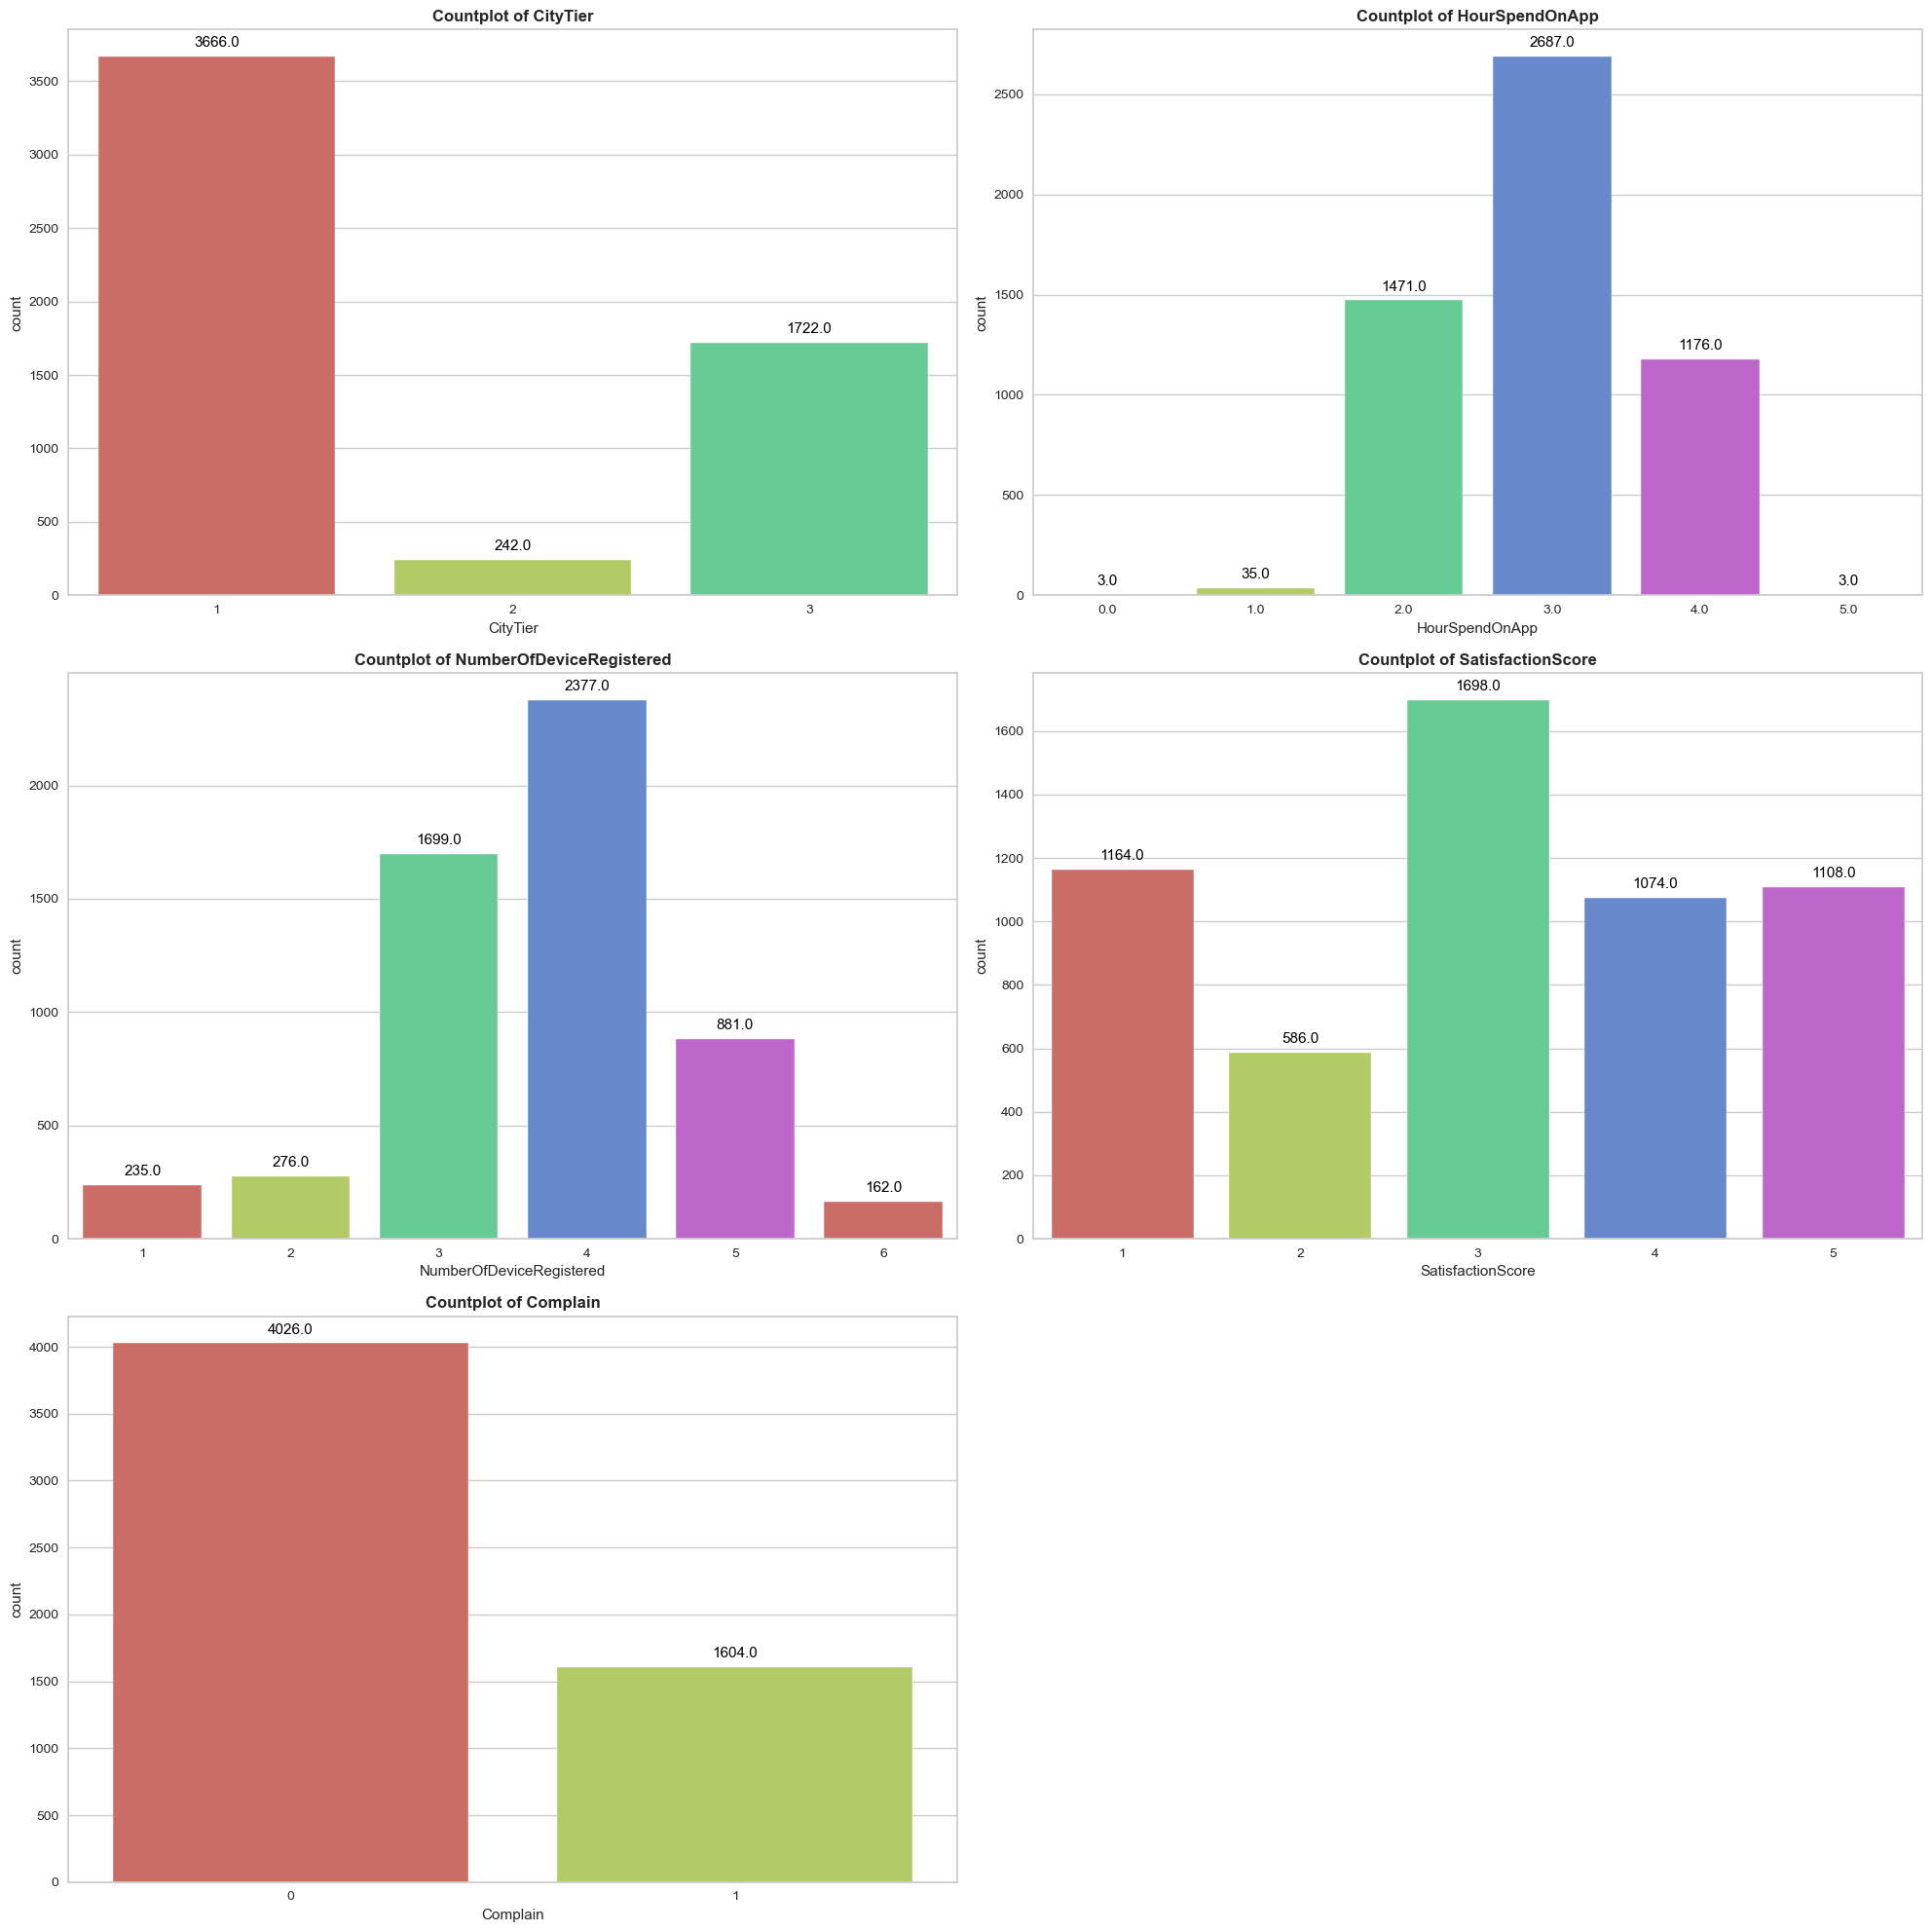

In [14]:
# Set the number of rows and columns in the subplot grid
nrows = 3
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Set the color palette
palette = sns.color_palette("hls", len(discrete_vars))

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(discrete_vars):
    sns.countplot(data=data_copy, x=col, ax=axs[i], palette=palette)

    # Set the title of the subplot
    axs[i].set_title(f'Countplot of {col}', fontweight='bold')

    # Add count annotations to each bar
    for p in axs[i].patches:
        axs[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                         textcoords='offset points')

# Remove empty subplots
for ax in axs[len(discrete_vars):]:
    ax.remove()

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

### Check Distribution of Continuous Data

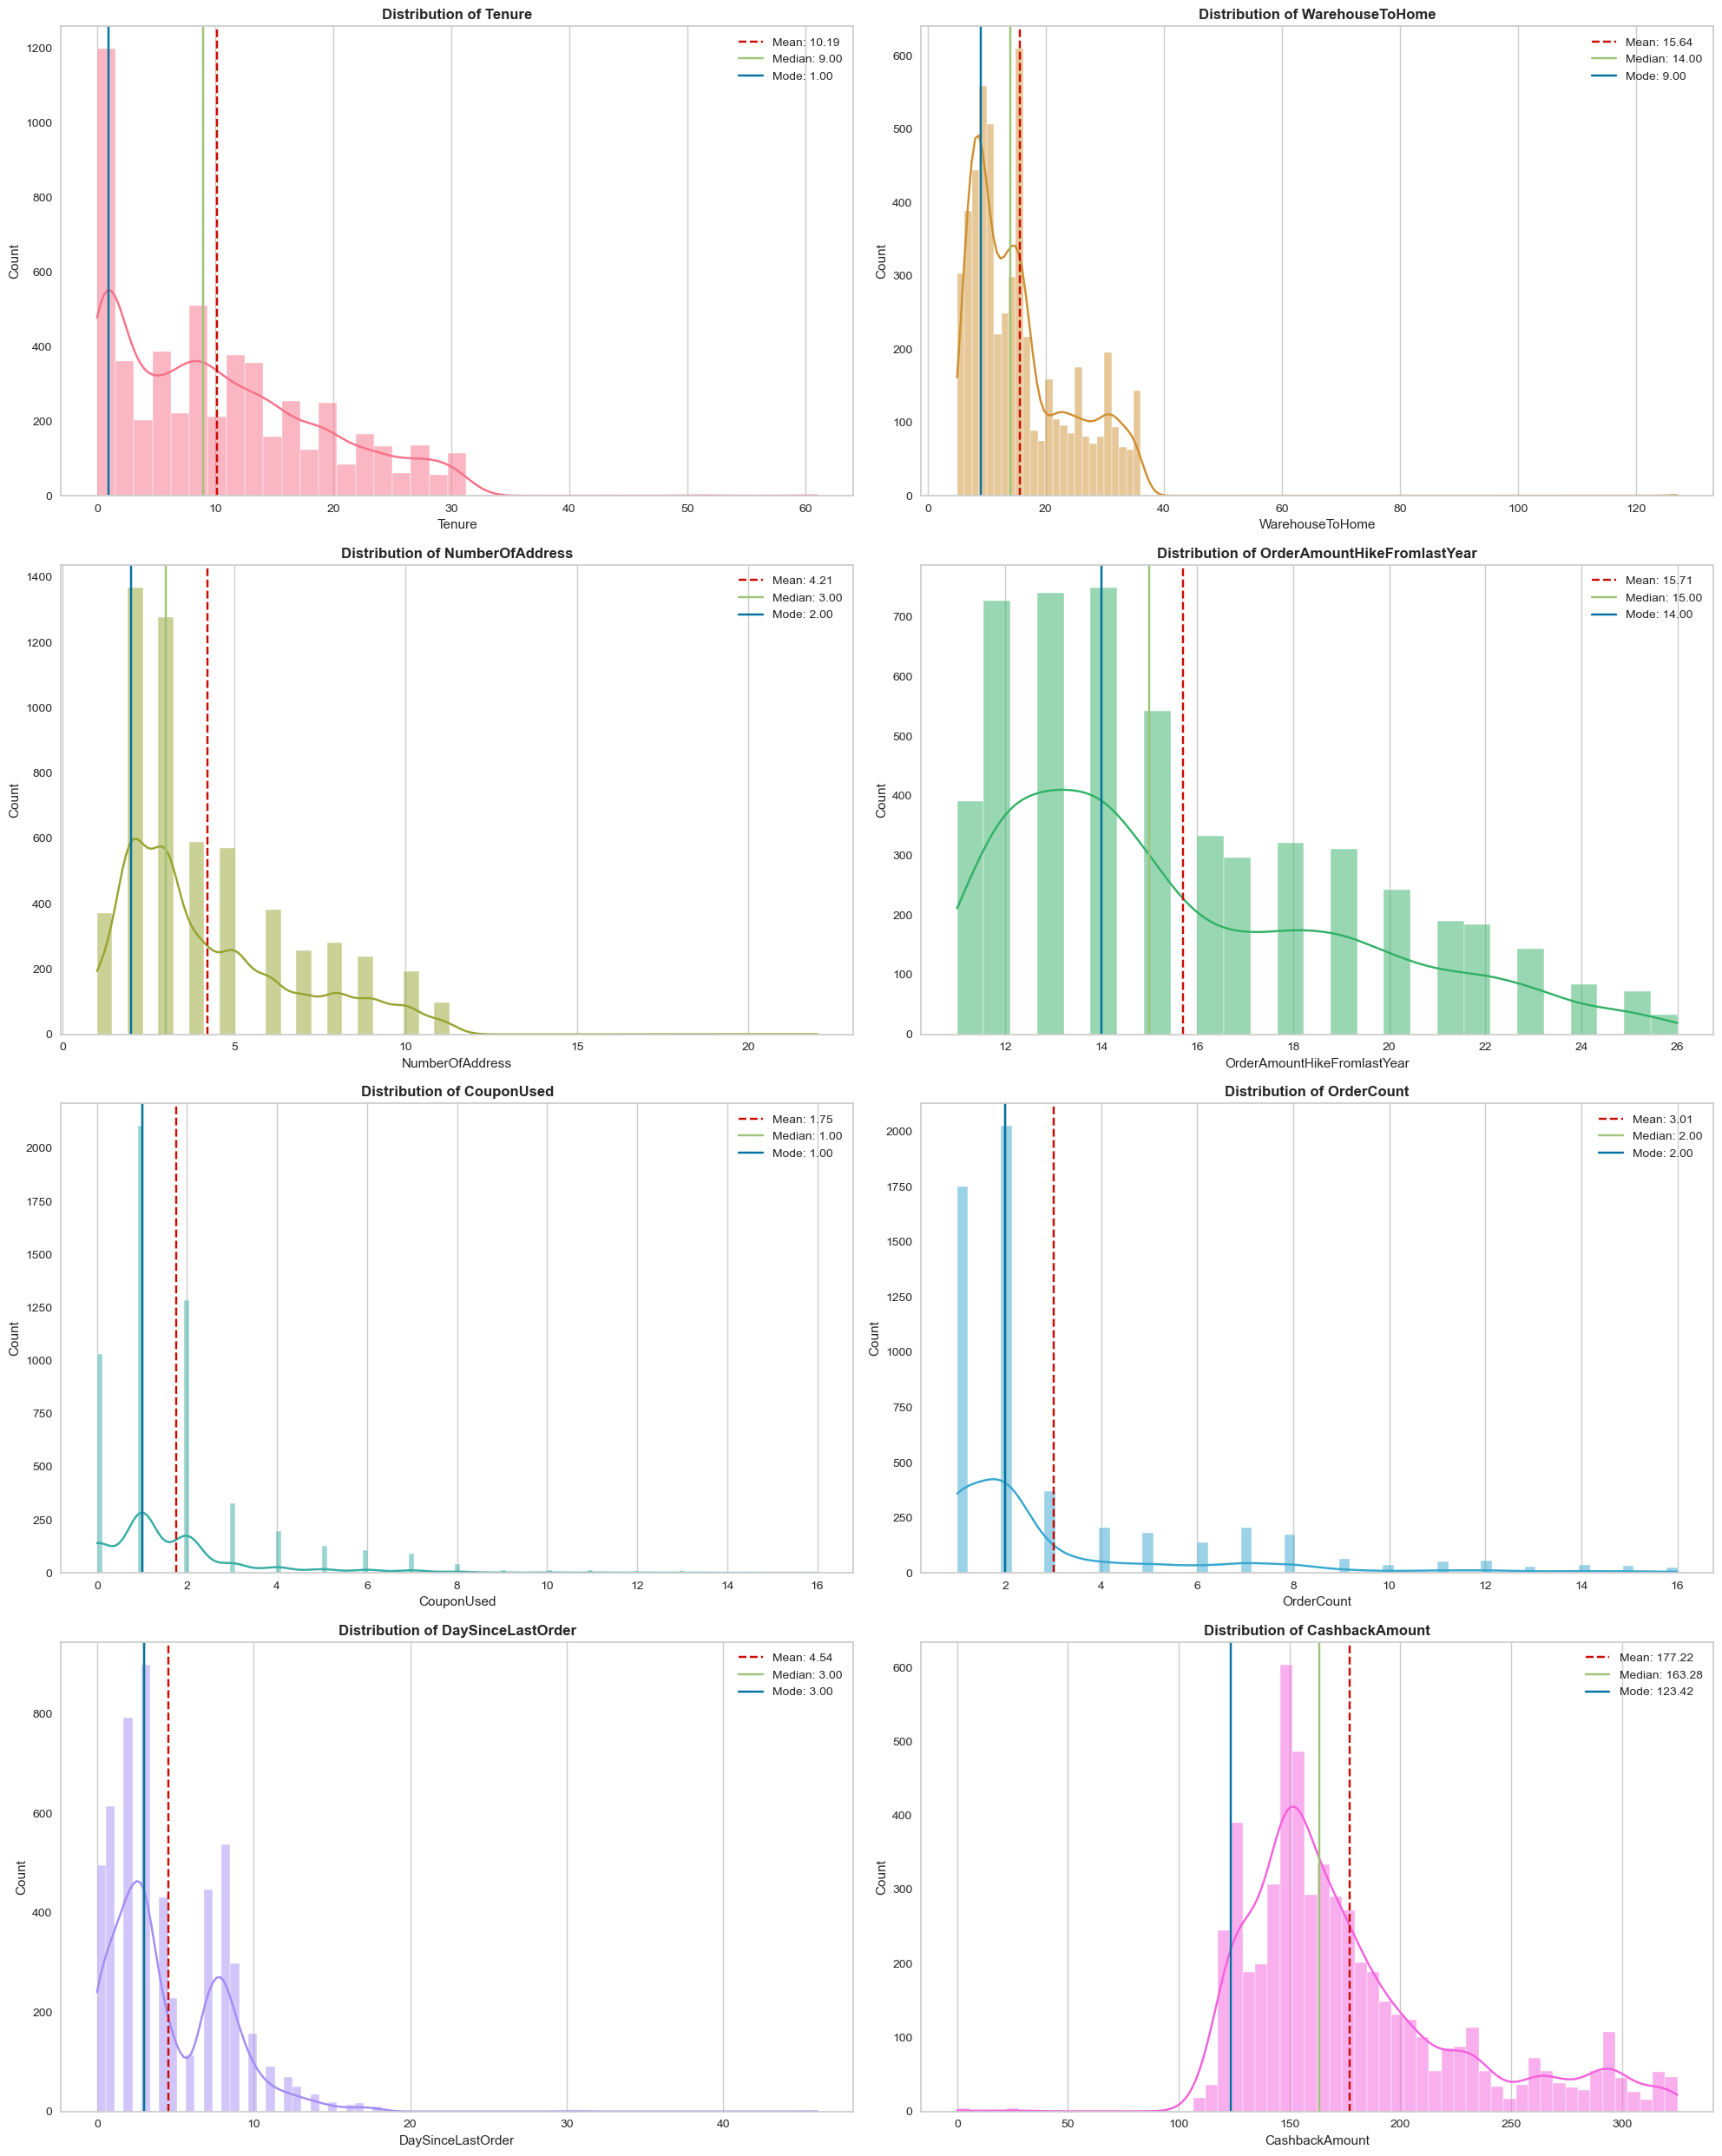

In [15]:
# Set the number of rows and columns in the subplot grid
nrows = 4
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Set the color palette
palette = sns.color_palette("husl", len(continuous_vars))

# Iterate over the columns and plot a histplot for each column
# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(continuous_vars):
    sns.histplot(data=data_copy, x=col, ax=axs[i], color=palette[i] ,kde=True)

    # Set the title of the subplot
    axs[i].set_title(f'Distribution of {col}', fontweight='bold')
    
    # Add grid
    axs[i].grid(axis='y')

    # Calculate mean, median, mode and standard deviation
    mu = data_copy[col].mean()
    median = data_copy[col].median()
    mode = data_copy[col].mode().get(0, np.nan)
    sigma = data_copy[col].std()

    # Add vertical lines for mean, median and mode
    axs[i].axvline(mu, color='r', linestyle='--', label=f'Mean: {mu:.2f}')
    axs[i].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    axs[i].axvline(mode, color='b', linestyle='-', label=f'Mode: {mode:.2f}')

    # Create custom legends
#     legend_custom = [Line2D([0], [0], color='r', lw=2, label=f'Mean: {mu:.2f}'),
#                      Line2D([0], [0], color='g', lw=2, label=f'Median: {median:.2f}'),
#                      Line2D([0], [0], color='b', lw=2, label=f'Mode: {mode:.2f}'),
#                      Patch(facecolor=palette[i], edgecolor=palette[i], label=f'Distribution: {col}')]

    # Add legend
    axs[i].legend(loc="best")
#     axs[i].legend(handles=legend_custom)

# Remove empty subplots
for ax in axs[len(continuous_vars):]:
    ax.remove()

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

### Check Distribution of Nominal Variable

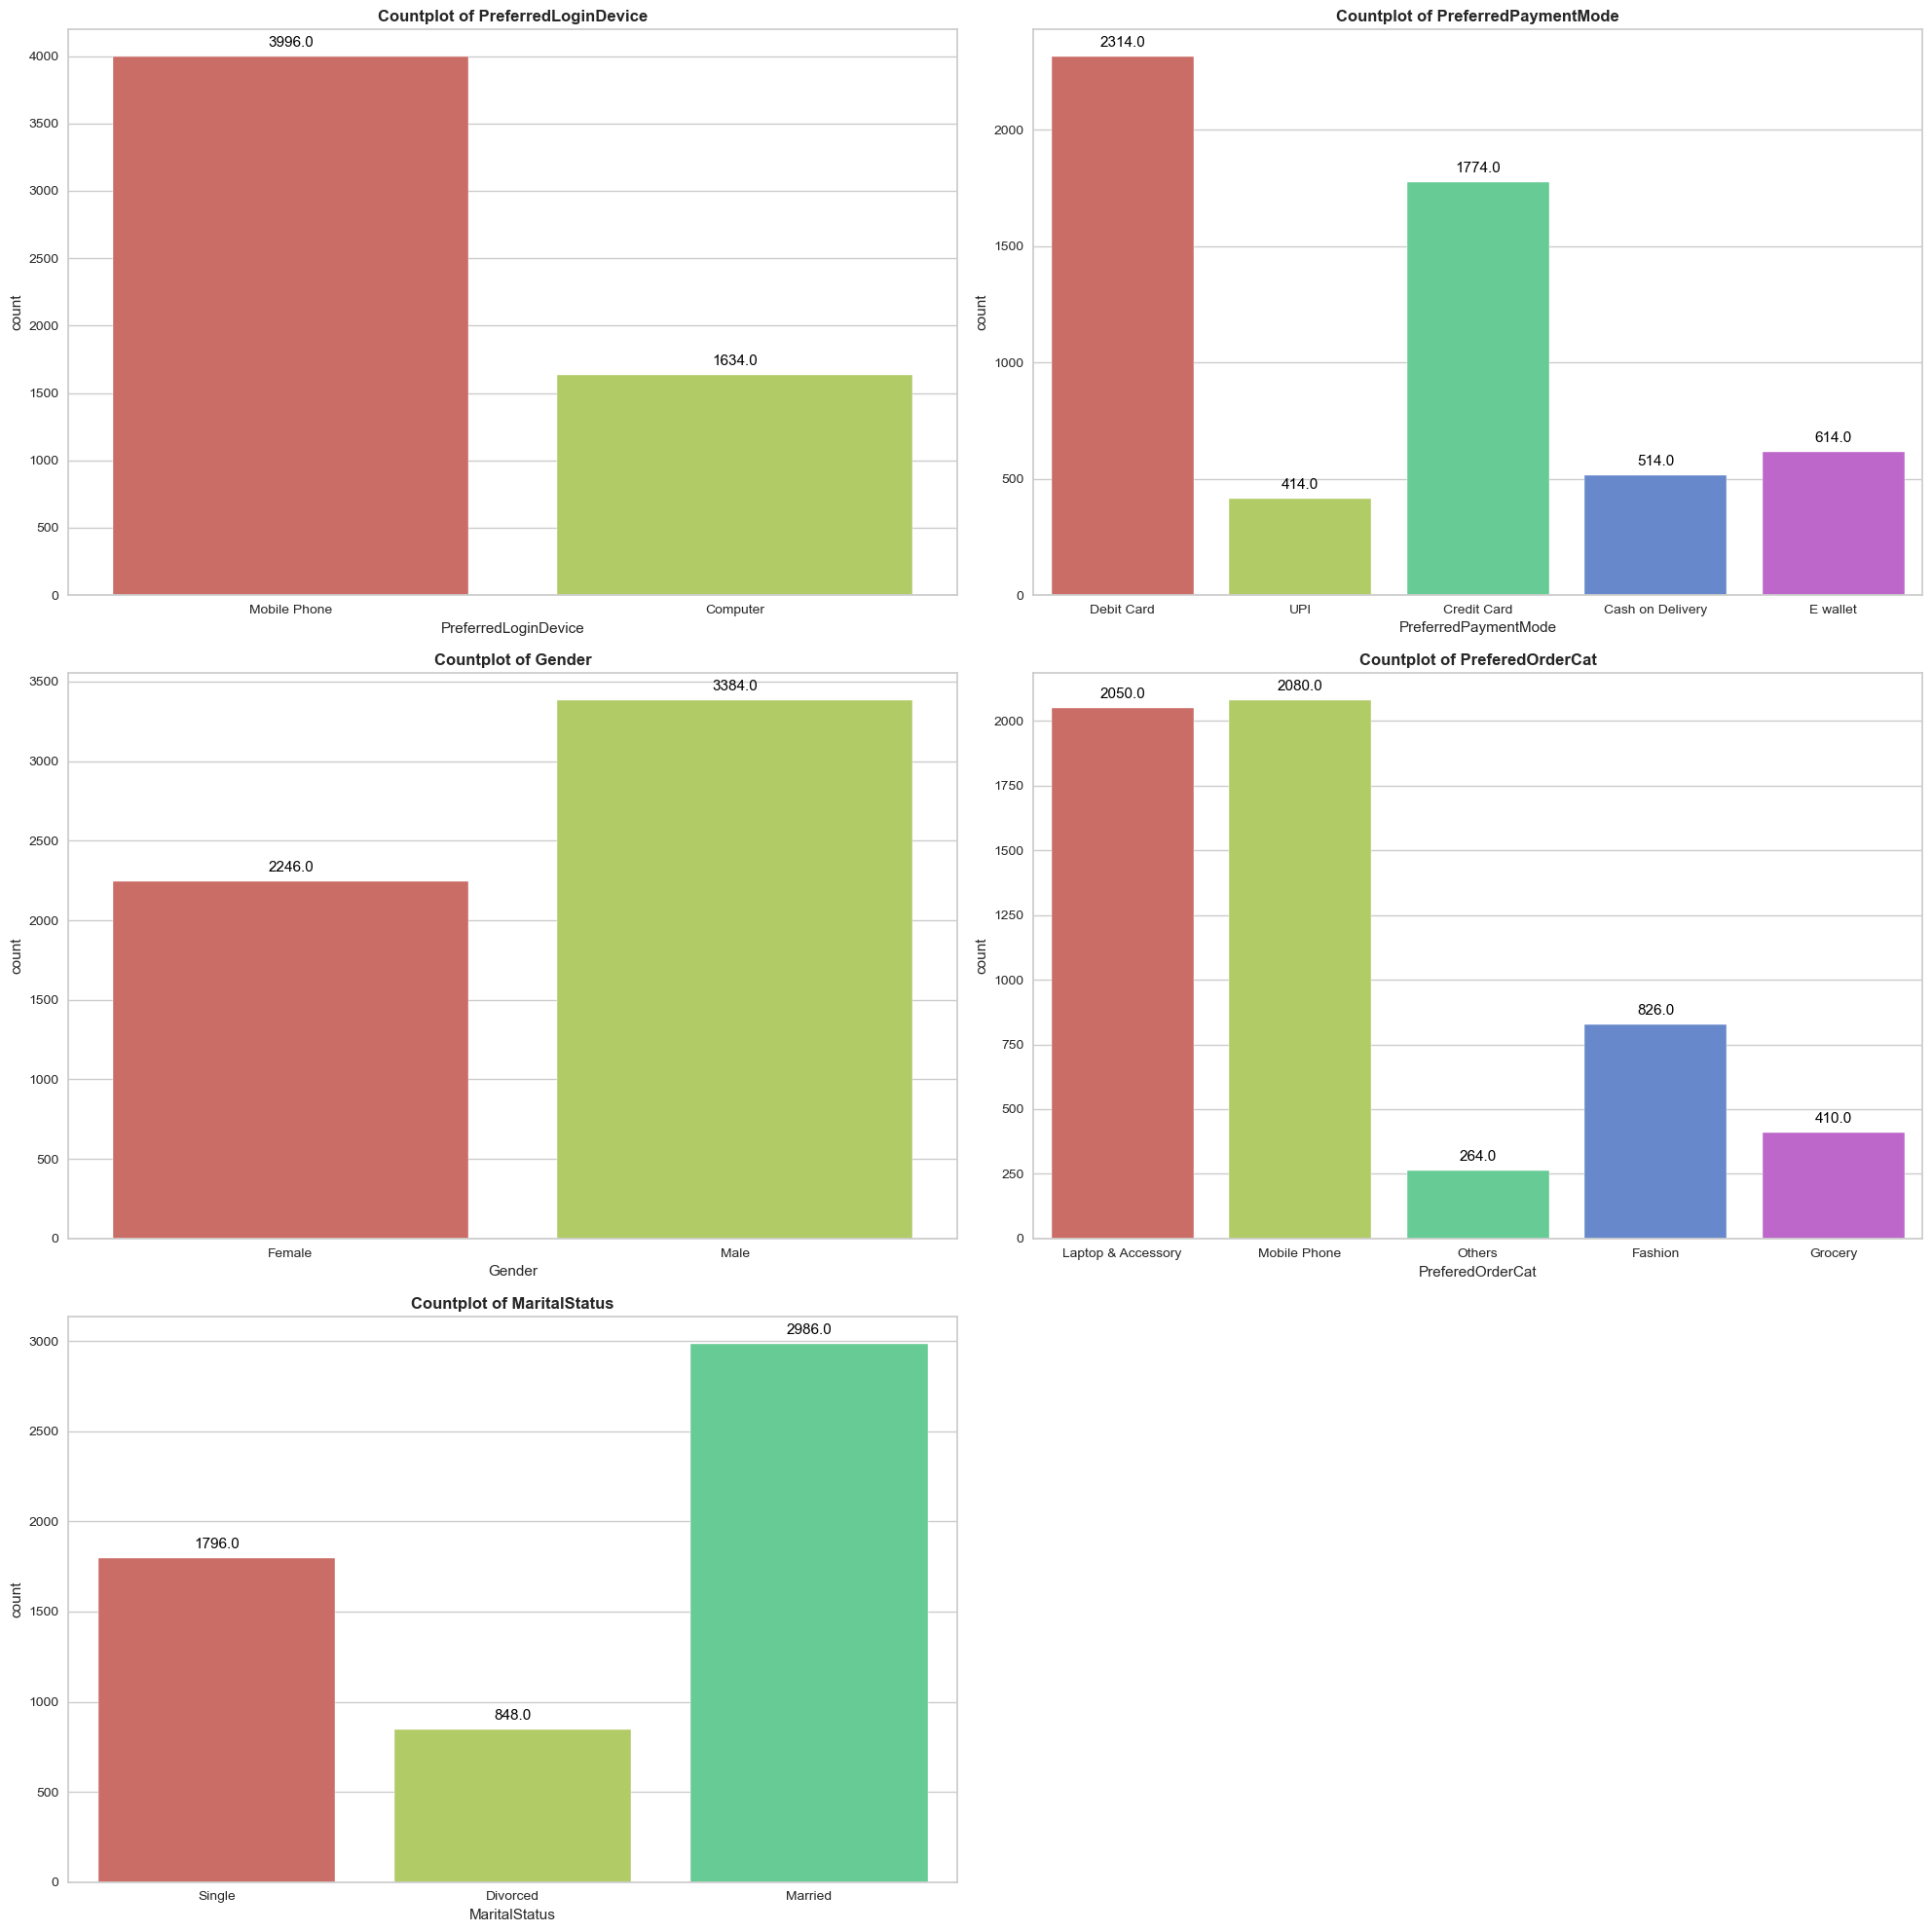

In [16]:
# Set the number of rows and columns in the subplot grid
nrows = 3
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Set the color palette
palette = sns.color_palette("hls", len(nominal_vars))

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(nominal_vars):
    sns.countplot(data=data_copy, x=col, ax=axs[i], palette=palette)

    # Set the title of the subplot
    axs[i].set_title(f'Countplot of {col}', fontweight='bold')

    # Add count annotations to each bar
    for p in axs[i].patches:
        axs[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                         textcoords='offset points')

# Remove empty subplots
for ax in axs[len(nominal_vars):]:
    ax.remove()

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

### Outlier Detection

Outliers can occur in both categorical and numerical data, but they are typically more relevant and easier to identify in numerical data. Here's how you can think about outliers for the different types of data:

- Continuous data: Outliers are most common and easily identifiable in continuous data. These are values that are significantly higher or lower than most of the other values in the dataset. Techniques like box plots, z-scores, or IQR (Interquartile Range) methods can be used to identify outliers.

- Discrete data: Outliers can also exist in discrete data, but they may be harder to identify because discrete data is countable and each unique value could be considered as a separate category. However, if you have a large count for a particular discrete value and a very small count for another, the latter could potentially be considered an outlier.

- Nominal and Ordinal data: For categorical data (both nominal and ordinal), outliers don't have the same concept as in numerical data. However, rare categories (categories with very few instances) can be thought of as "outliers". But instead of eliminating them, as you might do with numerical outliers, it's often more appropriate to group these into an "Other" category, depending on the specific use case.

__Limitation of using Boxplot and IQR__:

Boxplots and IQR (Interquartile Range): These methods are also somewhat sensitive to the distribution of the data. In skewed distributions or distributions with heavy tails, these methods might identify many points as outliers that are not really unusual. However, they are generally more robust to outliers than the Z-score method.

__Limitation of using Z-score__:

Though Z-Score is a highly efficient way of detecting and removing outliers, we cannot use it with every data type. When we said that, we mean that it only works with the data which is completely or close to normally distributed, which in turn stimulates that this method is not for skewed data, either left skew or right skew. 

So in summary, when checking for outliers as a part of your data preprocessing, you would typically focus more on the continuous and sometimes discrete data. For categorical data, you might rather look for rare categories.

#### Using Box Plot

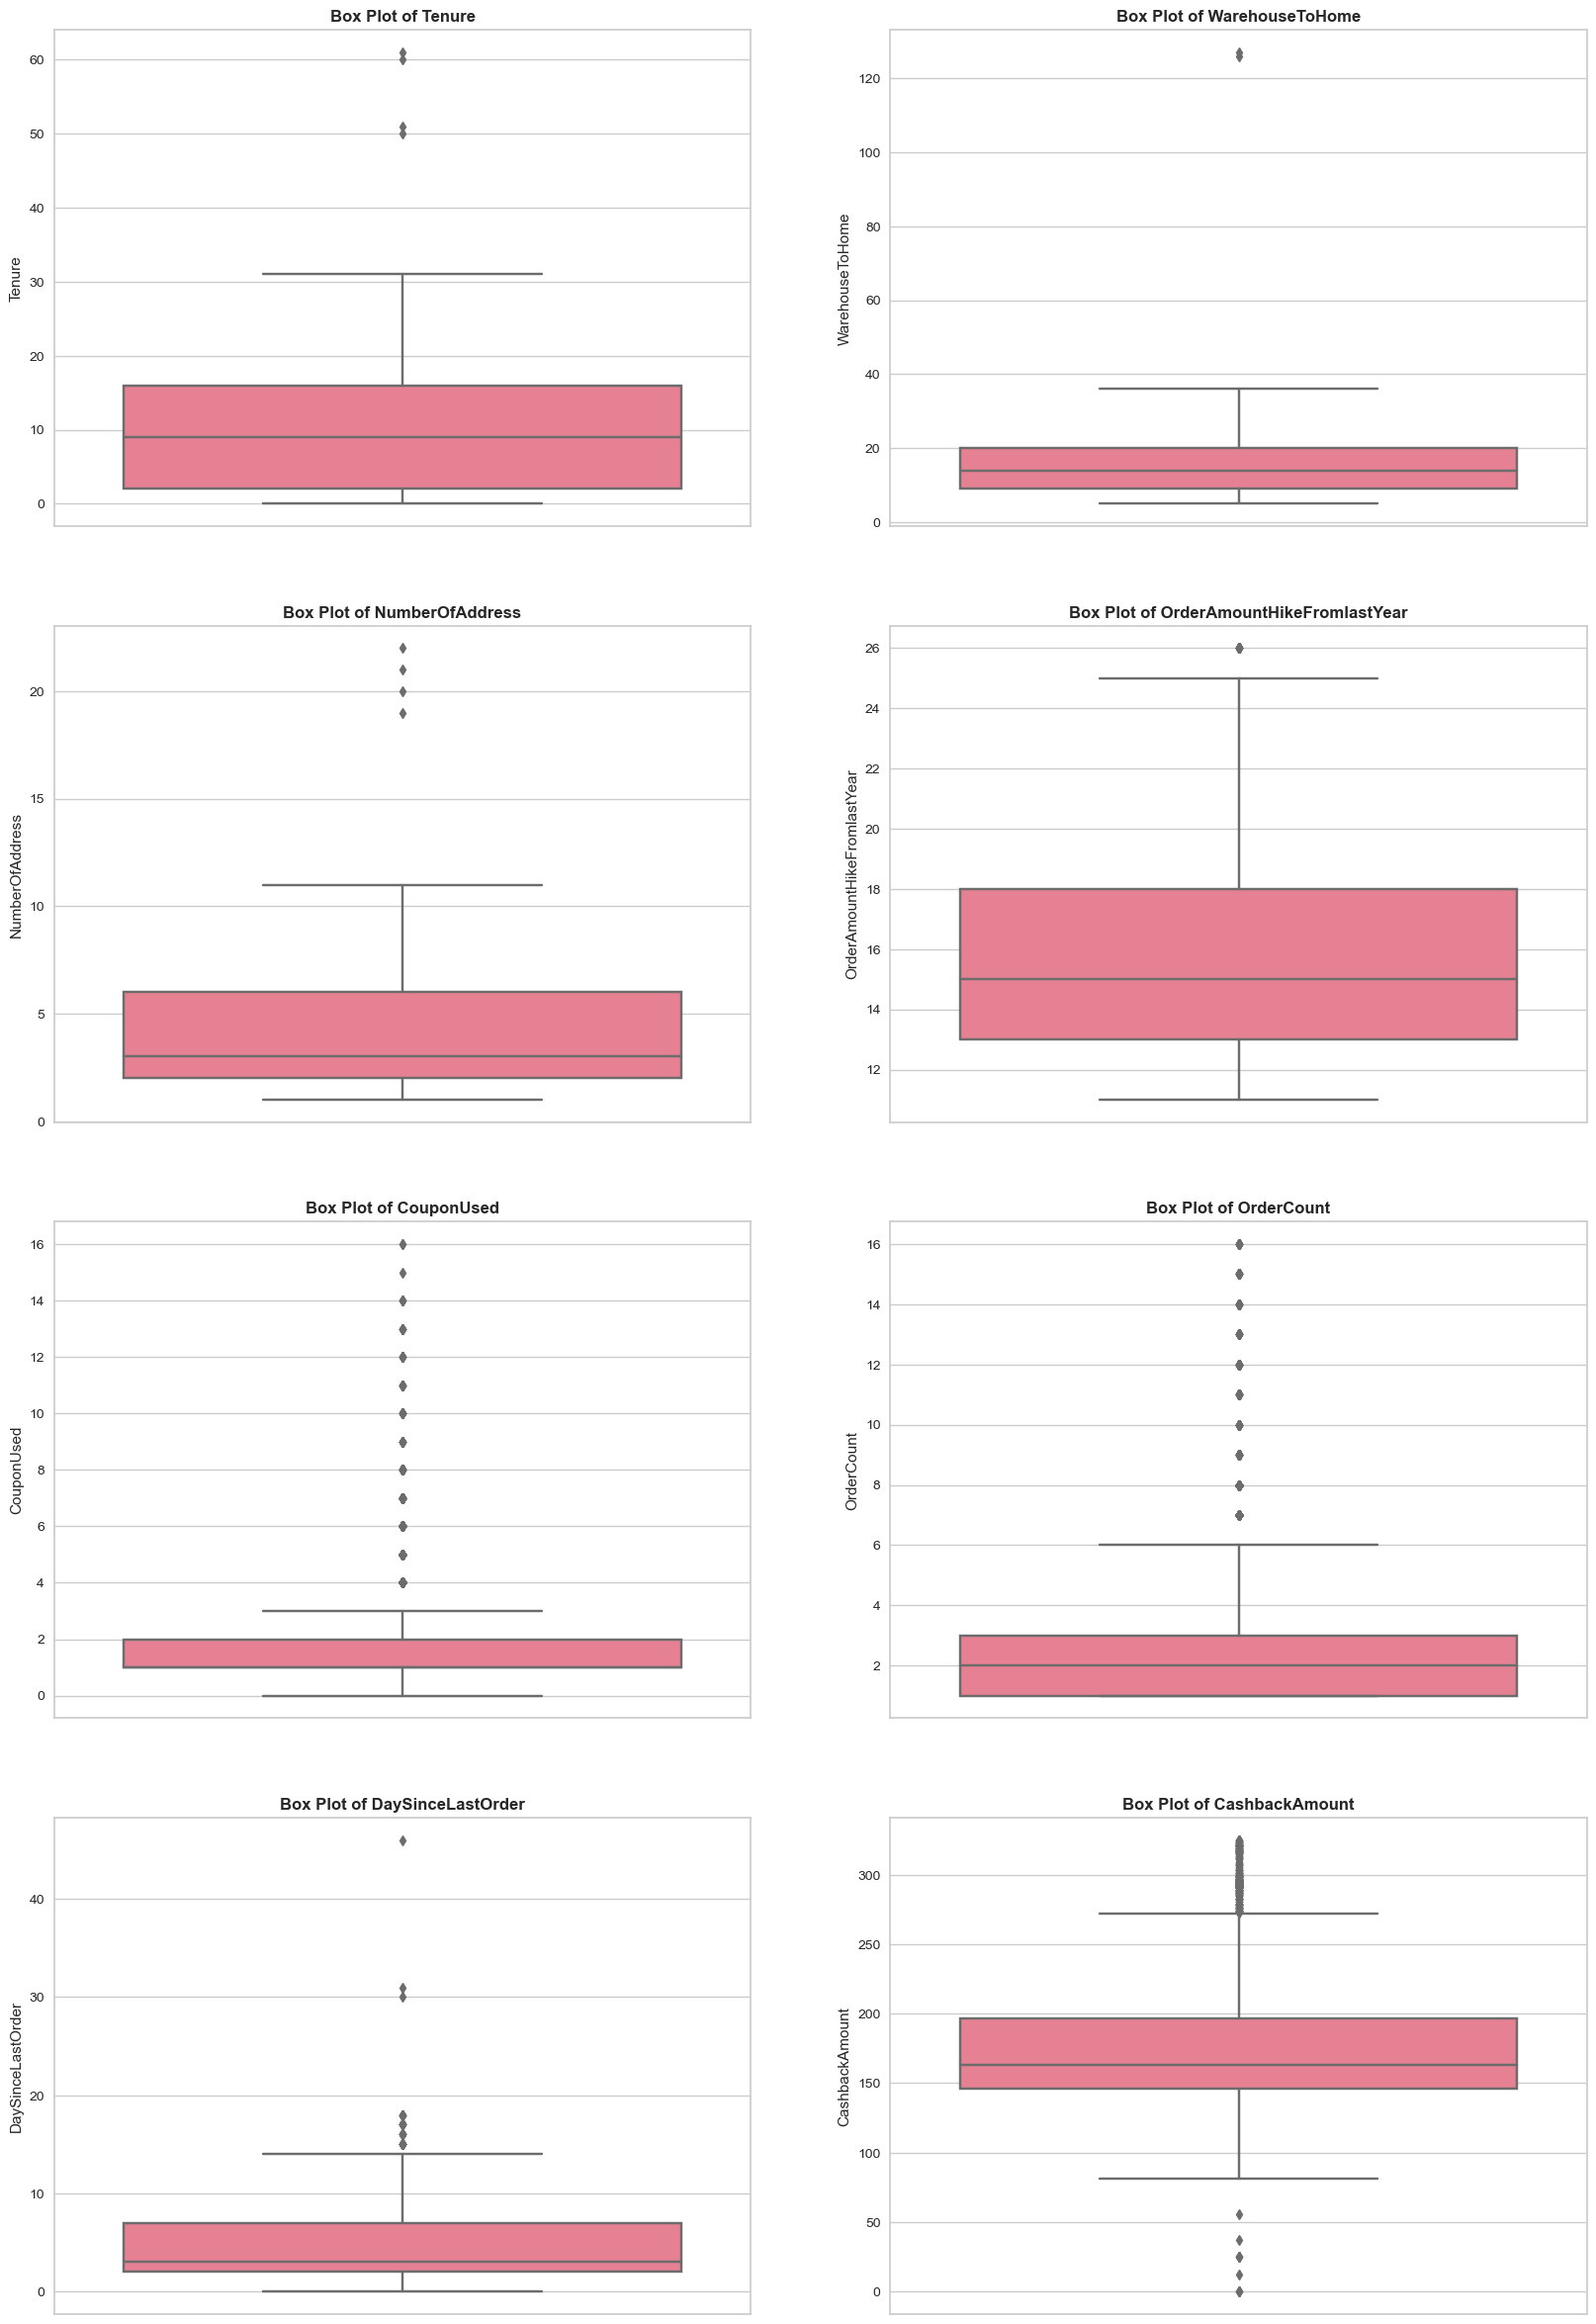

In [17]:
nrows = 4
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Set the color palette
palette = sns.color_palette("husl", len(continuous_vars))

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(continuous_vars):
    sns.boxplot(data=data_copy, y=col, ax=axs[i], palette=palette)
    
    # Set the title of the subplot
    axs[i].set_title(f'Box Plot of {col}', fontweight='bold')
    

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

#### Using IQR

In [18]:
# check for outliers
for column in continuous_vars:
    q1 = data_copy[column].quantile(0.25)
    q3 = data_copy[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data_copy[column][(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)].values
    print(f"{column}: {len(data_copy[column][(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)])} outliers ({lower_bound} as lower bound and {upper_bound} as upper bound)")
    print(f"\n{outliers}\n")

Tenure: 4 outliers (-19.0 as lower bound and 37.0 as upper bound)

[50. 60. 51. 61.]

WarehouseToHome: 2 outliers (-7.5 as lower bound and 36.5 as upper bound)

[126. 127.]

NumberOfAddress: 4 outliers (-4.0 as lower bound and 12.0 as upper bound)

[19 21 20 22]

OrderAmountHikeFromlastYear: 33 outliers (5.5 as lower bound and 25.5 as upper bound)

[26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26.
 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26. 26.]

CouponUsed: 629 outliers (-0.5 as lower bound and 3.5 as upper bound)

[ 4.  9.  6. 11.  4.  4.  7. 12.  4. 10.  4.  6.  4.  5.  5.  4.  6.  7.
  5.  7.  6.  9.  7.  7.  9.  5. 13.  5.  4.  4.  4.  5.  6.  6.  6.  6.
 11.  4.  9.  4.  7.  4.  5.  4.  5.  7.  5.  4.  6.  4.  6.  5. 15.  5.
  7.  5.  6.  5.  4.  5.  7.  4.  7.  6.  8.  5.  6. 10.  4.  7.  5.  7.
  5.  4.  5. 11.  5.  4.  7.  6. 13. 12.  6.  7.  5.  4.  5.  5.  4.  4.
  7.  4.  5.  4.  6.  6.  4.  6. 10.  7.  5.  4.  7.  4.  4.  4.  5.  6.
  4.

## Correlation Heatmap

### Correlation Score of Numerical Features to Target Feature

<Axes: >

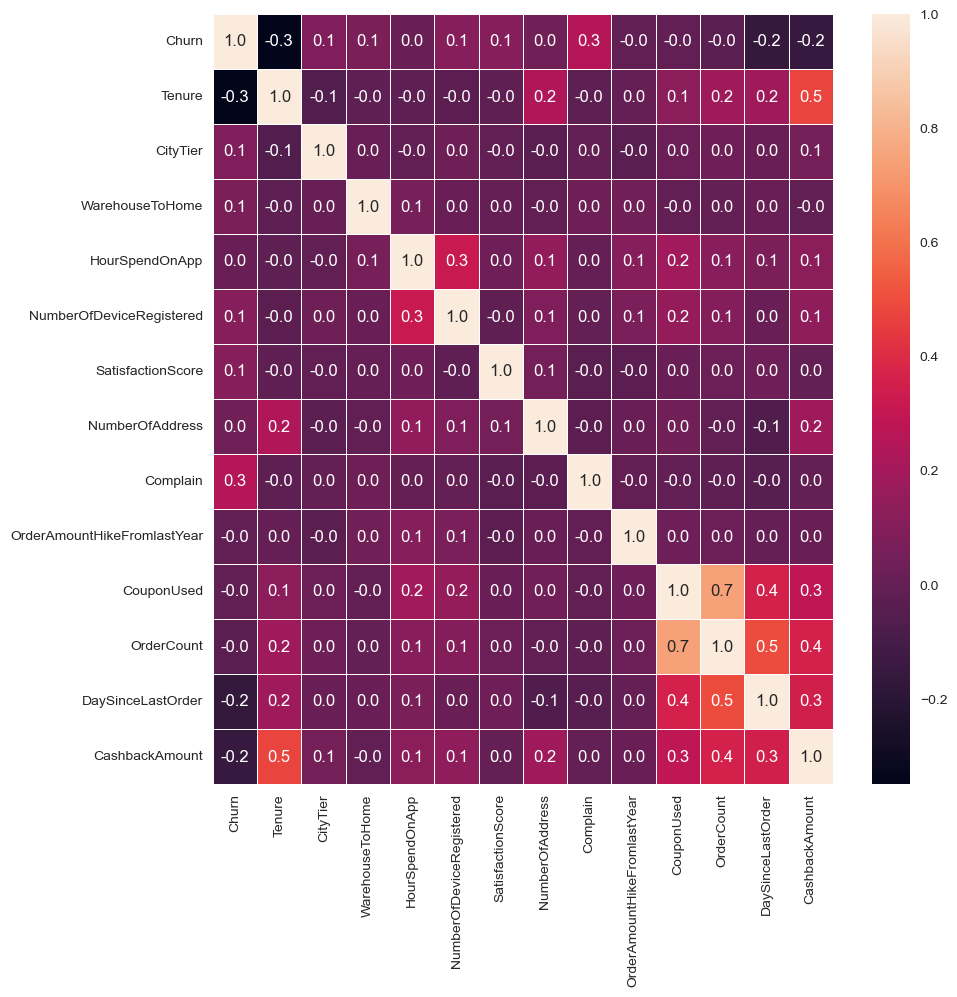

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_copy.drop(["CustomerID"], axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
data_copy.corr()["Churn"].sort_values(ascending=False)

Churn                          1.000000
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
CustomerID                    -0.019083
OrderCount                    -0.028697
CashbackAmount                -0.154118
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64

### Correlation Score of Categorical Features and Target Feature

In [21]:
def check_categorical_relationship(data, feature1, feature2):
    # Null Hypothesis (H0): There is no relationship between feature1 and feature2
    # Alternative Hypothesis (H1): There is a relationship between feature1 and feature2
    
    # Chi-square Test of Independence
    contingency_table = pd.crosstab(data[feature1], data[feature2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-square Test of Independence between {feature1} and {feature2}:")
    print(f"  - Chi-square Statistic: {chi2}")
    print(f"  - P-value: {p}")
    
    if p < 0.05:
        print(f"  - Decision: Reject H0. There is a statistically significant relationship between {feature1} and {feature2}.")
    else:
        print(f"  - Decision: Fail to reject H0. There is no statistically significant relationship between {feature1} and {feature2}.")

    # Cramér's V
    cramers_v = np.sqrt(chi2 / (data.shape[0]*(min(contingency_table.shape)-1)))
    print(f"\nCramér's V for {feature2}: {cramers_v}")
    
    if cramers_v < 0.1:
        print(f"The association between {feature1} and {feature2} is very weak.")
    elif cramers_v < 0.3:
        print(f"The association between {feature1} and {feature2} is weak.")
    elif cramers_v < 0.5:
        print(f"The association between {feature1} and {feature2} is moderate.")
    else:
        print(f"The association between {feature1} and {feature2} is strong.")

## Bivariate Analysis

In [22]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### Churn Rate based on Gender

Is there a difference in churn rate between genders?

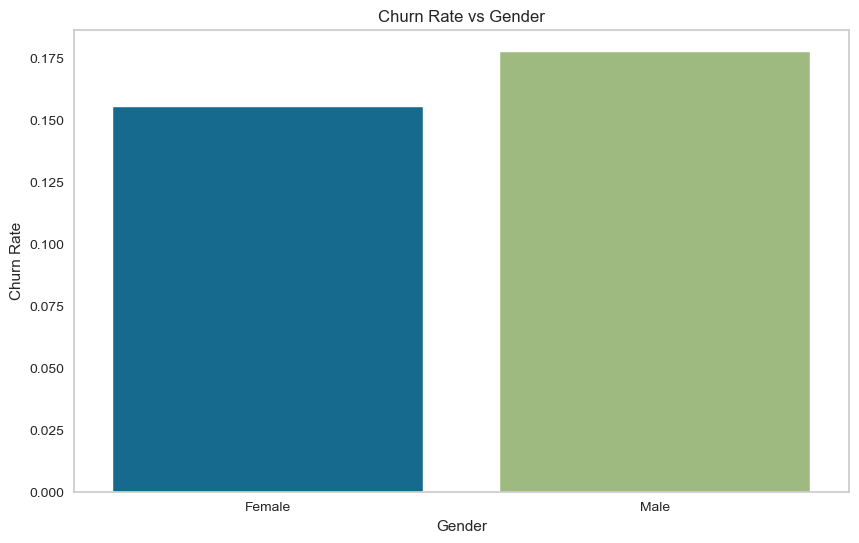

,Gender,Churn
0,Female,0.154942
1,Male,0.177305


In [25]:
# Compute churn rate
churn_gender = data_copy.groupby('Gender')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
plt.grid(axis='y')
sns.barplot(x='Gender', y='Churn', data=churn_gender)
plt.title('Churn Rate vs Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.show()

churn_gender.sort_values("Churn", ascending=False)

### Churn Rate based on Marital Status

### Churn Rate based on Tenure

Is there a relationship between tenure and churn rate?

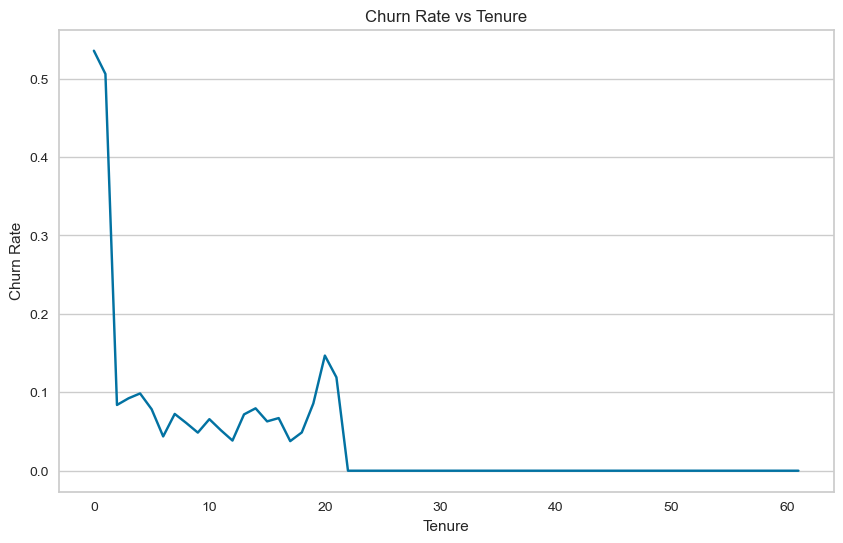

In [26]:
# Compute churn rate for each tenure
churn_rate_tenure = data_copy.groupby('Tenure')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
plt.grid(axis='x')
sns.lineplot(x='Tenure', y='Churn', data=churn_rate_tenure, markers="X")
plt.title('Churn Rate vs Tenure')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure')
# plt.xticks(ticks=data_copy.Tenure.dropna().values, fontsize=12)
plt.show()

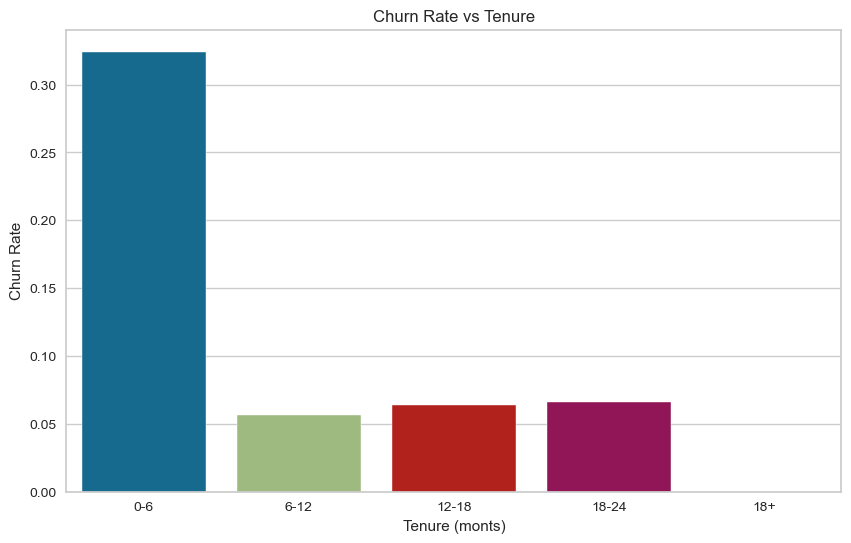

,TenureGroup,Churn
0,0-6,0.324186
1,6-12,0.056818
2,12-18,0.063758
3,18-24,0.066318
4,18+,0.000000


In [29]:
# Define bins
bins = [-np.inf, 6, 12, 18, 24, np.inf]
labels = ['0-6', '6-12', '12-18', '18-24', '24+']

# Create a new column for the tenure group
data_copy['TenureGroup'] = pd.cut(data_copy['Tenure'], bins=bins, labels=labels)

# Compute churn rate
churn_rate_tenure = data_copy.groupby('TenureGroup')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
sns.barplot(x='TenureGroup', y='Churn', data=churn_rate_tenure)
plt.title('Churn Rate vs Tenure')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure (monts)')
plt.show()

churn_rate_tenure.sort_values("Churn", ascending=False)

### Churn Rate based on Device

#### How does the churn rate differ for each Preferred Login Device?

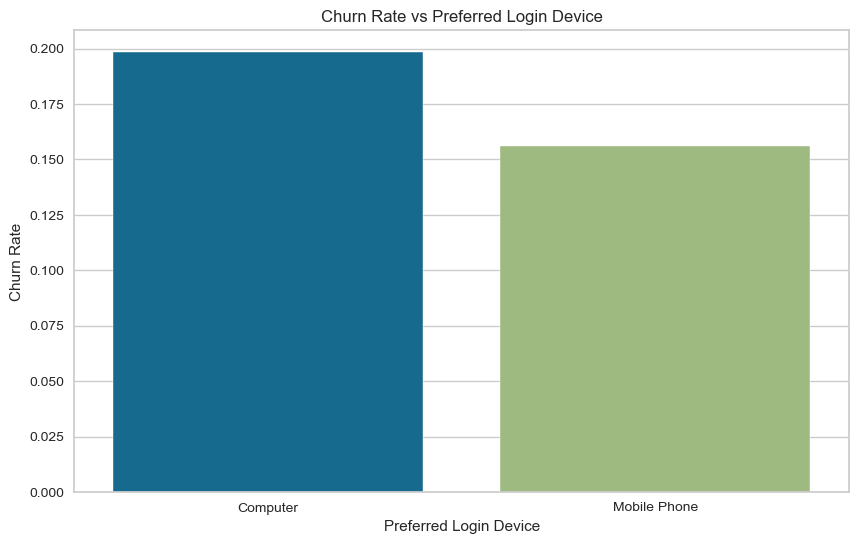


Chi-square Test of Independence between Churn and PreferredLoginDevice:
  - Chi-square Statistic: 14.40125265089403
  - P-value: 0.0001477040239947965
  - Decision: Reject H0. There is a statistically significant relationship between Churn and PreferredLoginDevice.

Cramér's V for PreferredLoginDevice: 0.05057616989336402
The association between Churn and PreferredLoginDevice is very weak.


,PreferredLoginDevice,Churn
0,Computer,0.198286
1,Mobile Phone,0.156156


In [35]:
# Compute churn rate
churn_device = data_copy.groupby('PreferredLoginDevice')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
sns.barplot(x='PreferredLoginDevice', y='Churn', data=churn_device)
plt.title('Churn Rate vs Preferred Login Device')
plt.ylabel('Churn Rate')
plt.xlabel('Preferred Login Device')
plt.show()

check_categorical_relationship(data_copy, "Churn", 'PreferredLoginDevice')

churn_device.sort_values("Churn", ascending=False)

#### Does the churn rate vary across different genders for each Preferred Login Device?

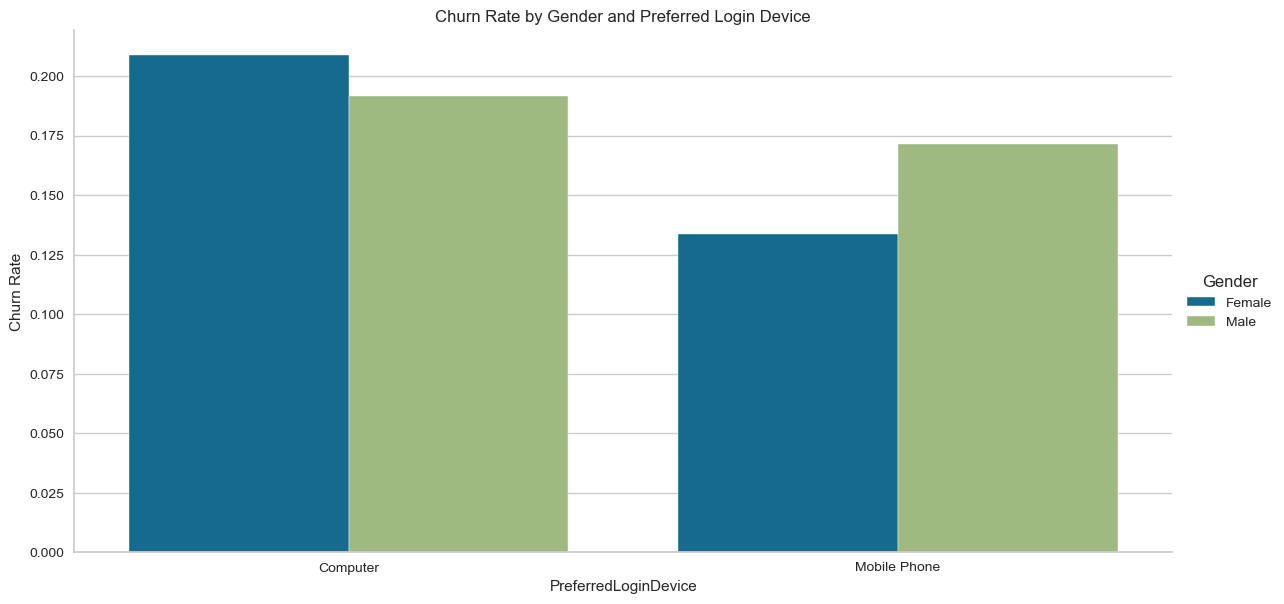


Chi-square Test of Independence between PreferredLoginDevice and Gender:
  - Chi-square Statistic: 1.3475847651254786
  - P-value: 0.24570079559053315
  - Decision: Fail to reject H0. There is no statistically significant relationship between PreferredLoginDevice and Gender.

Cramér's V for Gender: 0.015471194600510657
The association between PreferredLoginDevice and Gender is very weak.


,Gender,PreferredLoginDevice,Churn
0,Female,Computer,0.208861
1,Female,Mobile Phone,0.133829
2,Male,Computer,0.191617
3,Male,Mobile Phone,0.171285


In [36]:
# First calculate churn rate for each combination of gender and preferred login device
churn_rate_gender_device = data_copy.groupby(['Gender', 'PreferredLoginDevice'])['Churn'].mean().reset_index()

# Plot the churn rate
sns.catplot(x='PreferredLoginDevice', y='Churn', hue='Gender', data=churn_rate_gender_device, kind='bar', height=6, aspect=2)
plt.title('Churn Rate by Gender and Preferred Login Device')
plt.ylabel('Churn Rate')
plt.show()

check_categorical_relationship(data_copy, "PreferredLoginDevice", 'Gender')

churn_rate_gender_device.sort_values("Churn", ascending=False)

### Churn Rate based on Payment Mode

#### How does the churn rate vary for each Preferred Payment Mode?

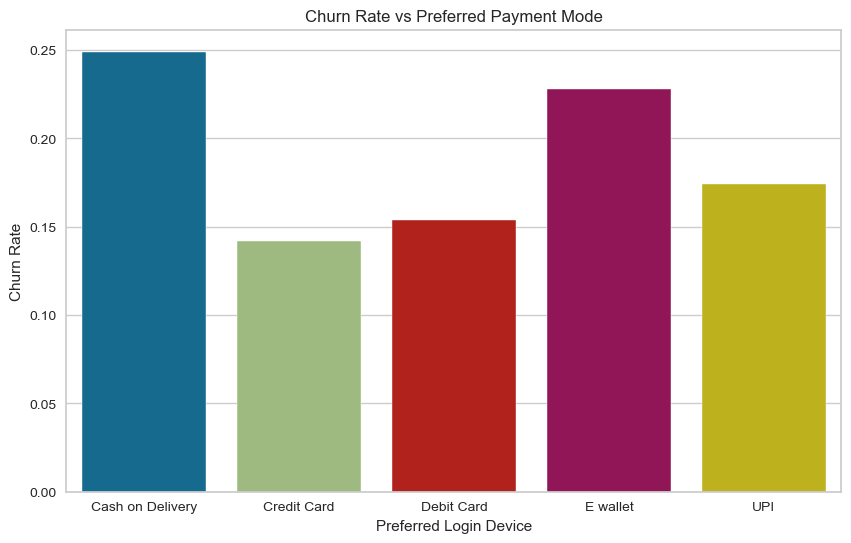


Chi-square Test of Independence between Churn and PreferredPaymentMode:
  - Chi-square Statistic: 51.82895974579938
  - P-value: 1.4978570960706276e-10
  - Decision: Reject H0. There is a statistically significant relationship between Churn and PreferredPaymentMode.

Cramér's V for PreferredPaymentMode: 0.09594714329533893
The association between Churn and PreferredPaymentMode is very weak.


,PreferredPaymentMode,Churn
0,Cash on Delivery,0.249027
1,Credit Card,0.142052
2,Debit Card,0.153846
3,E wallet,0.228013
4,UPI,0.173913


In [37]:
# Compute churn rate
churn_payment = data_copy.groupby('PreferredPaymentMode')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
sns.barplot(x='PreferredPaymentMode', y='Churn', data=churn_payment)
plt.title('Churn Rate vs Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.xlabel('Preferred Login Device')
plt.show()

check_categorical_relationship(data_copy, "Churn", 'PreferredPaymentMode')

churn_payment.sort_values("Churn", ascending=False)

#### Does the churn rate differ based on gender for each Preferred Payment Mode?

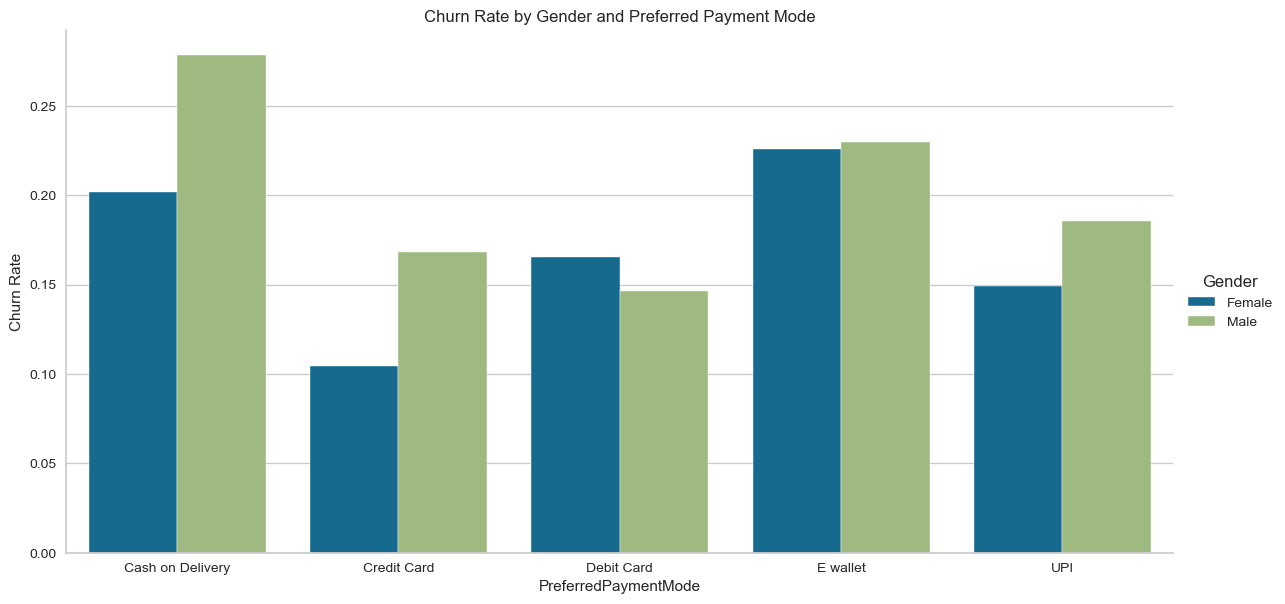


Chi-square Test of Independence between PreferredPaymentMode and Gender:
  - Chi-square Statistic: 14.179921762031894
  - P-value: 0.006742415837398666
  - Decision: Reject H0. There is a statistically significant relationship between PreferredPaymentMode and Gender.

Cramér's V for Gender: 0.050186015902743165
The association between PreferredPaymentMode and Gender is very weak.


,Gender,PreferredPaymentMode,Churn
5,Male,Cash on Delivery,0.278481
8,Male,E wallet,0.229885
3,Female,E wallet,0.225564
0,Female,Cash on Delivery,0.202020
9,Male,UPI,0.185714
6,Male,Credit Card,0.168260
2,Female,Debit Card,0.165217
4,Female,UPI,0.149254
7,Male,Debit Card,0.146341
1,Female,Credit Card,0.104396


In [40]:
# First calculate churn rate for each combination of gender and preferred Payment Mode
churn_rate_gender_payment = data_copy.groupby(['Gender', 'PreferredPaymentMode'])['Churn'].mean().reset_index()

# Plot the churn rate
sns.catplot(x='PreferredPaymentMode', y='Churn', hue='Gender', data=churn_rate_gender_payment, kind='bar', height=6, aspect=2)
plt.title('Churn Rate by Gender and Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.show()

check_categorical_relationship(data_copy, "PreferredPaymentMode", 'Gender')

churn_rate_gender_payment.sort_values("Churn", ascending=False)

#### Does the churn rate differ based on Gender and Marital Status for each Preferred Payment Mode?

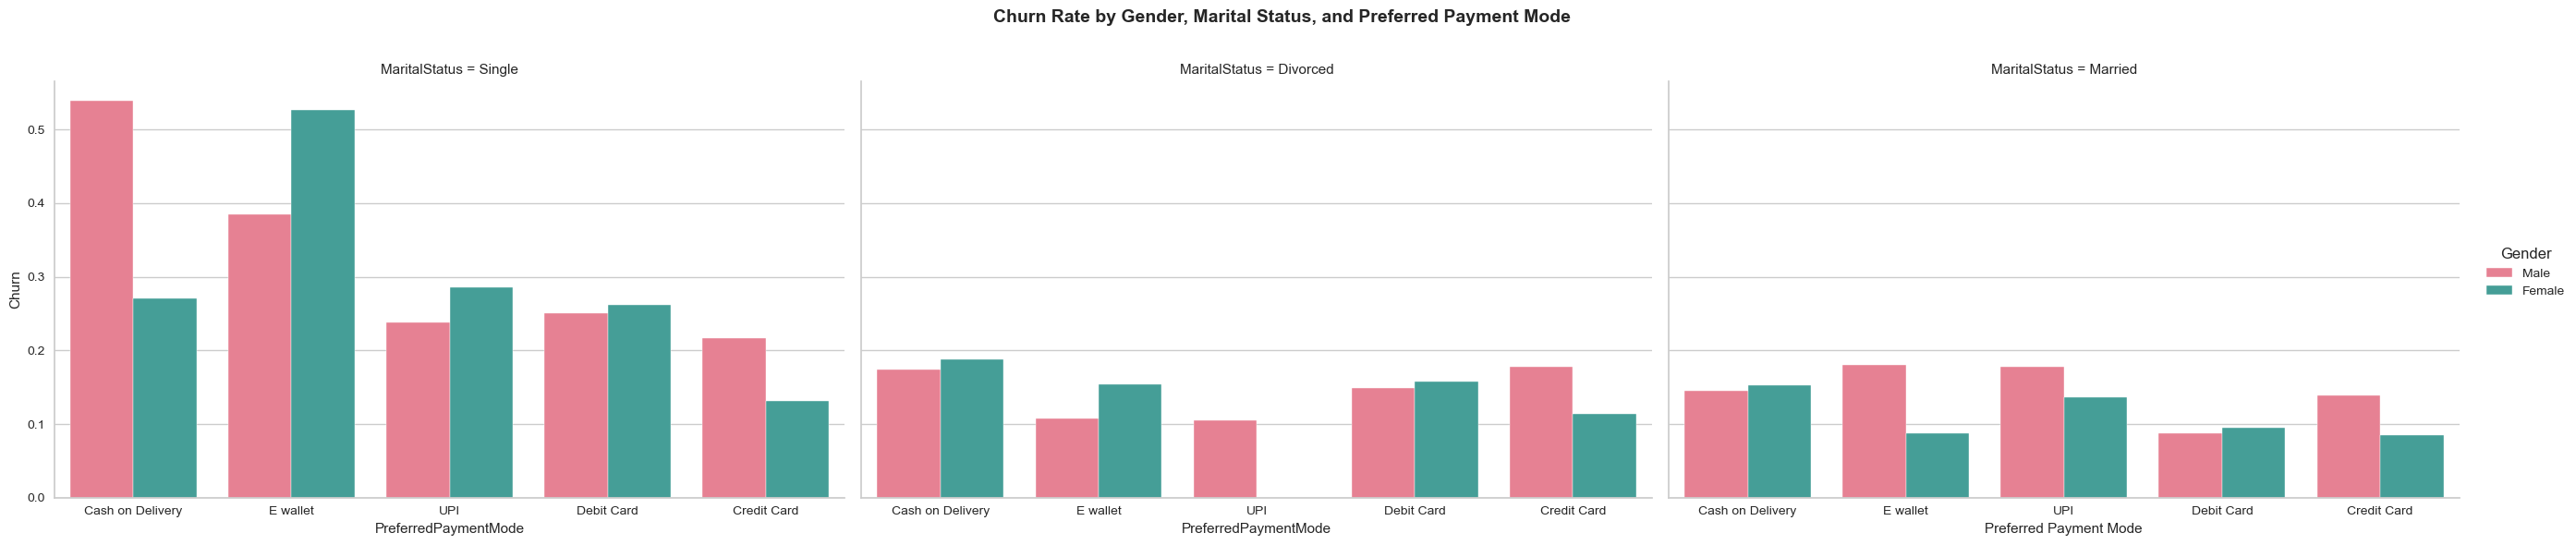


Chi-square Test of Independence between PreferredPaymentMode and MaritalStatus:
  - Chi-square Statistic: 14.805758743163532
  - P-value: 0.06303423966134156
  - Decision: Fail to reject H0. There is no statistically significant relationship between PreferredPaymentMode and MaritalStatus.

Cramér's V for MaritalStatus: 0.03626153120100096
The association between PreferredPaymentMode and MaritalStatus is very weak.


,Gender,MaritalStatus,PreferredPaymentMode,Churn
25,Male,Single,Cash on Delivery,0.538462
13,Female,Single,E wallet,0.526316
28,Male,Single,E wallet,0.384615
14,Female,Single,UPI,0.285714
10,Female,Single,Cash on Delivery,0.270270
12,Female,Single,Debit Card,0.261905
27,Male,Single,Debit Card,0.250000
29,Male,Single,UPI,0.238095
26,Male,Single,Credit Card,0.216561
0,Female,Divorced,Cash on Delivery,0.187500


In [56]:
# First calculate churn rate for each combination of gender, marital status, and Preferred Order Category
churn_rate_gender_maritalstatus_payment = data_copy.groupby(['Gender', 'MaritalStatus', 'PreferredPaymentMode'])['Churn'].mean().reset_index()

# Sort the dataframe by churn rate in descending order
churn_rate_gender_maritalstatus_payment.sort_values("Churn", ascending=False, inplace=True)

# Plot the churn rate
sns.catplot(x='PreferredPaymentMode', y='Churn', hue='Gender', col='MaritalStatus', data=churn_rate_gender_maritalstatus_payment, kind='bar', height=6, aspect=1.5, palette='husl')

# Set plot titles and labels
plt.suptitle('Churn Rate by Gender, Marital Status, and Preferred Payment Mode', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.85)
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.show()

# Perform the chi-square test and display results
check_categorical_relationship(data_copy, "PreferredPaymentMode", "MaritalStatus")

churn_rate_gender_maritalstatus_payment.sort_values(by=["Churn", "MaritalStatus"], ascending=[False, True])

### Churn Rate based on Preferred Order Category

#### How does the churn rate vary for each Preferred Order Category?

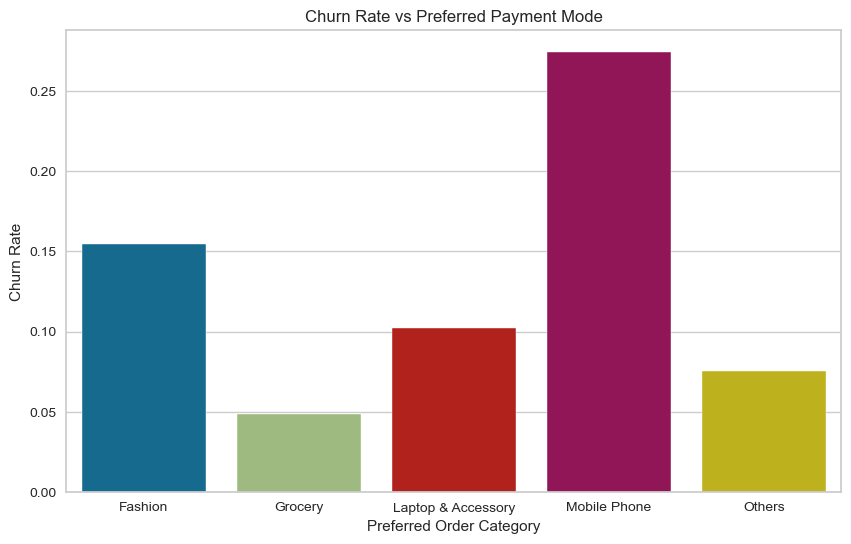


Chi-square Test of Independence between Churn and PreferedOrderCat:
  - Chi-square Statistic: 288.59778630344044
  - P-value: 3.11924340428766e-61
  - Decision: Reject H0. There is a statistically significant relationship between Churn and PreferedOrderCat.

Cramér's V for PreferedOrderCat: 0.2264082773371863
The association between Churn and PreferedOrderCat is weak.


,PreferedOrderCat,Churn
3,Mobile Phone,0.274038
0,Fashion,0.154964
2,Laptop & Accessory,0.102439
4,Others,0.075758
1,Grocery,0.048780


In [44]:
# Compute churn rate
churn_ordercat = data_copy.groupby('PreferedOrderCat')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
sns.barplot(x='PreferedOrderCat', y='Churn', data=churn_ordercat)
plt.title('Churn Rate vs Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.xlabel('Preferred Order Category')
plt.show()

check_categorical_relationship(data_copy, "Churn", 'PreferedOrderCat')

churn_ordercat.sort_values("Churn", ascending=False)

#### Does the churn rate differ across different genders for each Preferred Order Category?

In [52]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

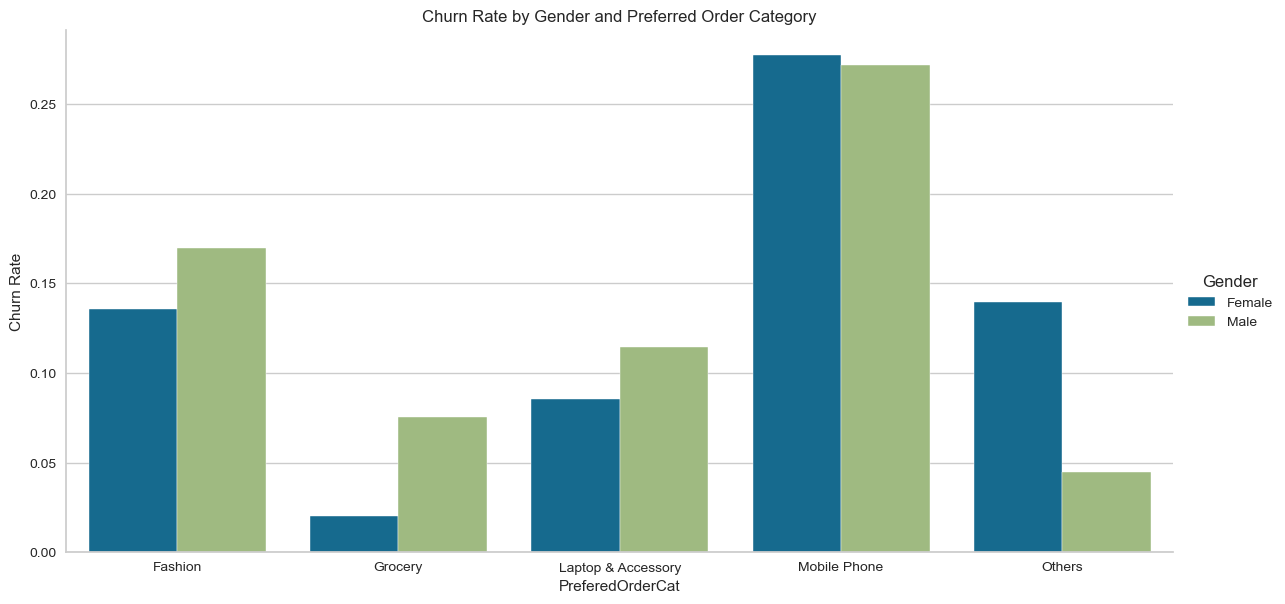


Chi-square Test of Independence between PreferedOrderCat and Gender:
  - Chi-square Statistic: 31.055258960935124
  - P-value: 2.9829554534127733e-06
  - Decision: Reject H0. There is a statistically significant relationship between PreferedOrderCat and Gender.

Cramér's V for Gender: 0.07426999250721804
The association between PreferedOrderCat and Gender is very weak.


,Gender,PreferedOrderCat,Churn
3,Female,Mobile Phone,0.277487
8,Male,Mobile Phone,0.272036
5,Male,Fashion,0.169492
4,Female,Others,0.139535
0,Female,Fashion,0.135593
7,Male,Laptop & Accessory,0.114428
2,Female,Laptop & Accessory,0.085308
6,Male,Grocery,0.075472
9,Male,Others,0.044944
1,Female,Grocery,0.020202


In [46]:
# First calculate churn rate for each combination of gender and Preferred Order Category
churn_rate_gender_ordercat = data_copy.groupby(['Gender', 'PreferedOrderCat'])['Churn'].mean().reset_index()

# Plot the churn rate
sns.catplot(x='PreferedOrderCat', y='Churn', hue='Gender', data=churn_rate_gender_ordercat, kind='bar', height=6, aspect=2)
plt.title('Churn Rate by Gender and Preferred Order Category')
plt.ylabel('Churn Rate')
plt.show()

check_categorical_relationship(data_copy, "PreferedOrderCat", 'Gender')

churn_rate_gender_ordercat.sort_values("Churn", ascending=False)

#### Does the churn rate differ accross different genders and marital status for each preferred Order Category

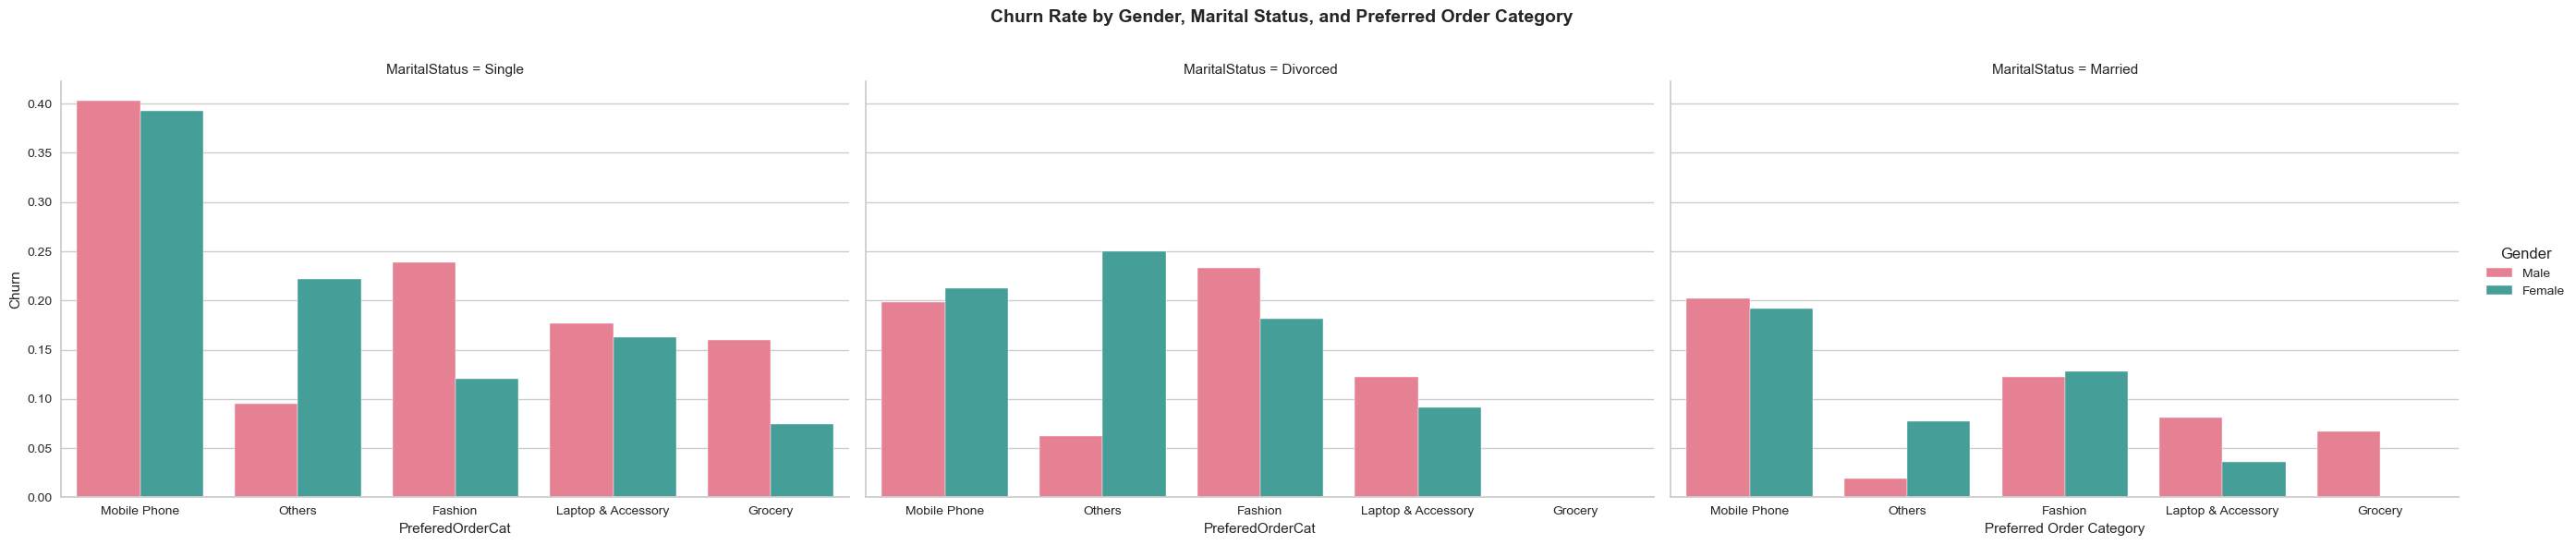


Chi-square Test of Independence between PreferedOrderCat and MaritalStatus:
  - Chi-square Statistic: 61.48015652474732
  - P-value: 2.386408561535701e-10
  - Decision: Reject H0. There is a statistically significant relationship between PreferedOrderCat and MaritalStatus.

Cramér's V for MaritalStatus: 0.07389214724808824
The association between PreferedOrderCat and MaritalStatus is very weak.


,Gender,MaritalStatus,PreferedOrderCat,Churn
28,Male,Single,Mobile Phone,0.402597
13,Female,Single,Mobile Phone,0.392405
4,Female,Divorced,Others,0.250000
25,Male,Single,Fashion,0.238806
15,Male,Divorced,Fashion,0.233333
14,Female,Single,Others,0.222222
3,Female,Divorced,Mobile Phone,0.212766
23,Male,Married,Mobile Phone,0.202454
18,Male,Divorced,Mobile Phone,0.198020
8,Female,Married,Mobile Phone,0.192090


In [48]:
# First calculate churn rate for each combination of gender, marital status, and Preferred Order Category
churn_rate_gender_maritalstatus_ordercat = data_copy.groupby(['Gender', 'MaritalStatus', 'PreferedOrderCat'])['Churn'].mean().reset_index()

# Sort the dataframe by churn rate in descending order
churn_rate_gender_maritalstatus_ordercat.sort_values("Churn", ascending=False, inplace=True)

# Plot the churn rate
sns.catplot(x='PreferedOrderCat', y='Churn', hue='Gender', col='MaritalStatus', data=churn_rate_gender_maritalstatus_ordercat, kind='bar', height=6, aspect=1.5, palette='husl')

# Set plot titles and labels
plt.suptitle('Churn Rate by Gender, Marital Status, and Preferred Order Category', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.85)
plt.xlabel('Preferred Order Category')
plt.ylabel('Churn Rate')
plt.show()

# Perform the chi-square test and display results
check_categorical_relationship(data_copy, "PreferedOrderCat", "MaritalStatus")

churn_rate_gender_maritalstatus_ordercat.sort_values(by=["Churn", "MaritalStatus"], ascending=[False, True])

#### How many cashback amount that commonly customers got for each Preferred Order Category?

NameError: name 'churn_rate_cashback' is not defined

<Figure size 1000x600 with 0 Axes>

#### How many complaints that commonly Preferred Order Category got?

In [57]:
data_copy.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'TenureGroup'],
      dtype='object')

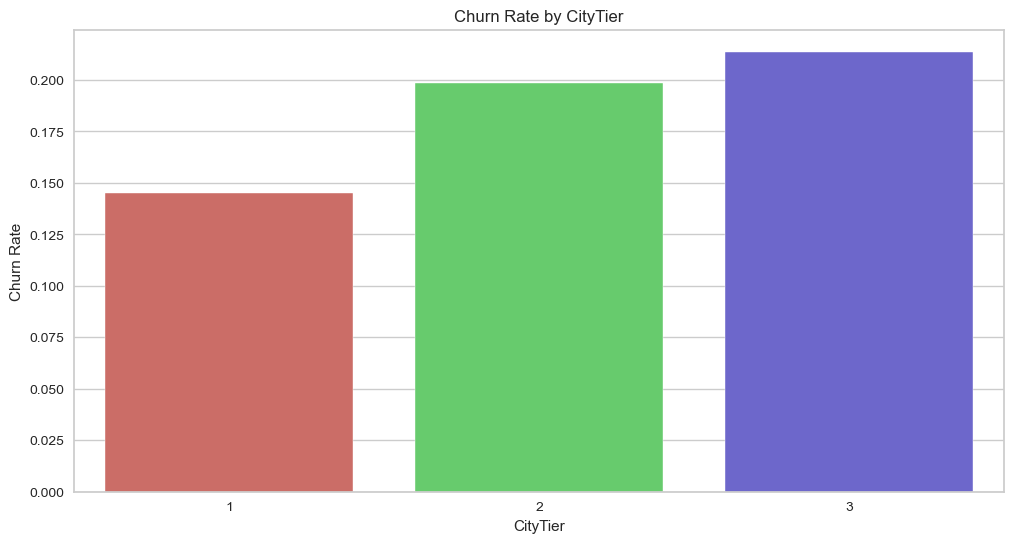

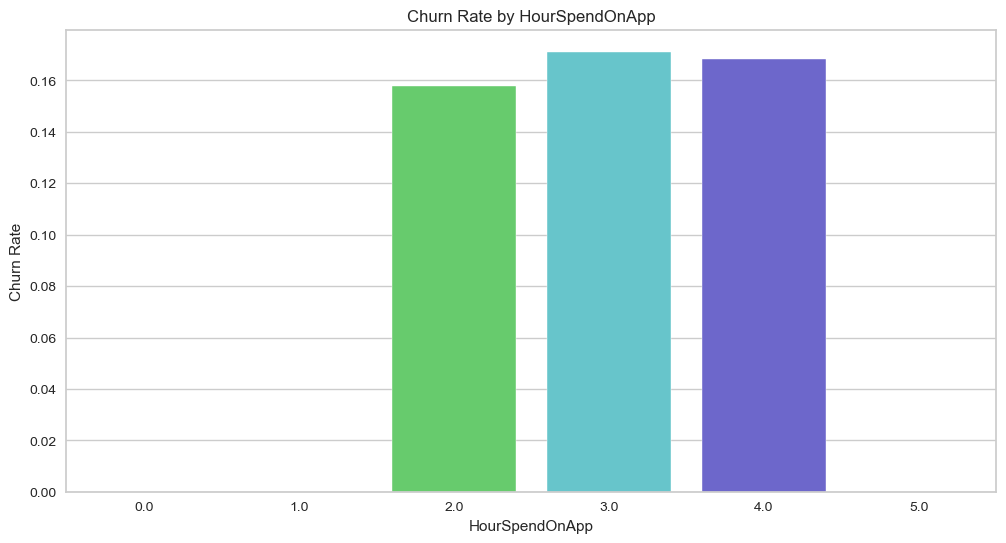

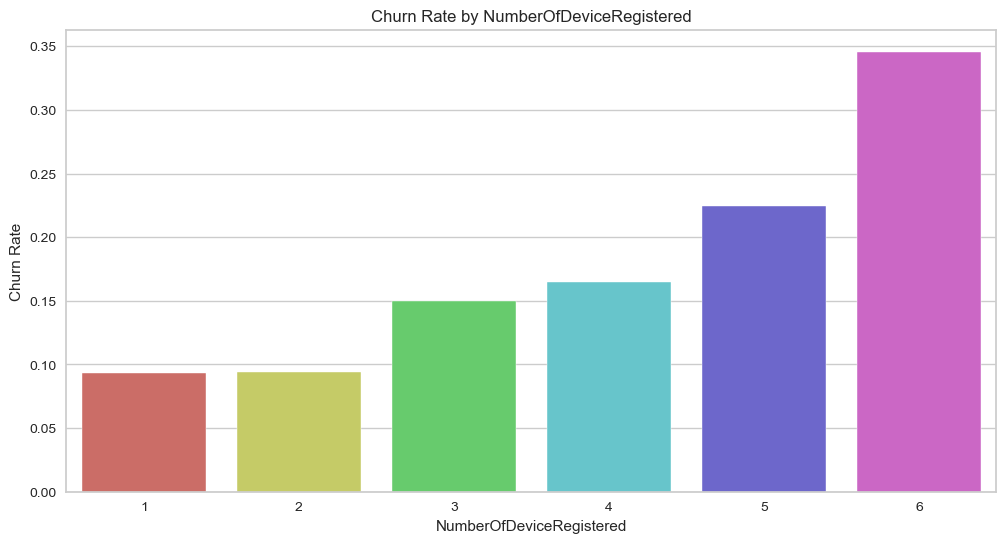

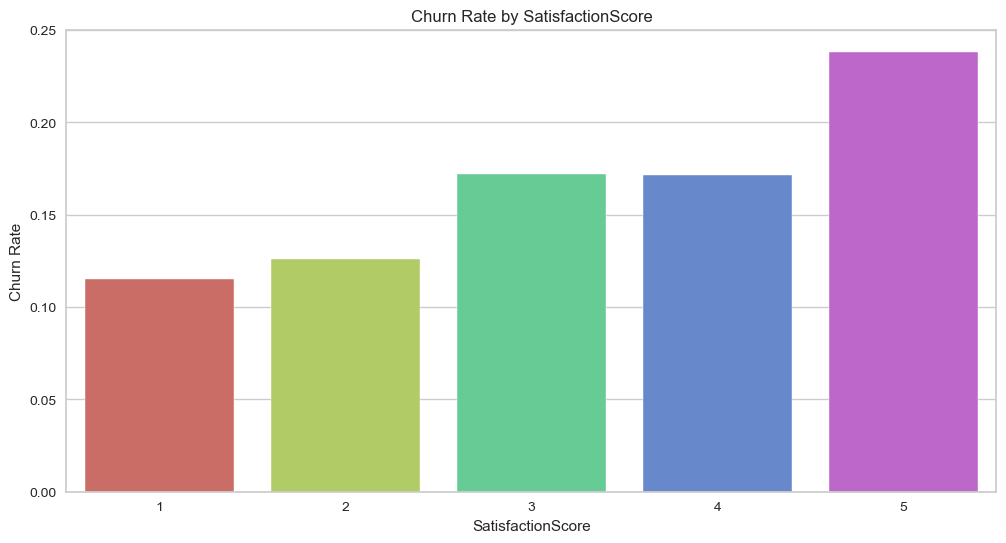

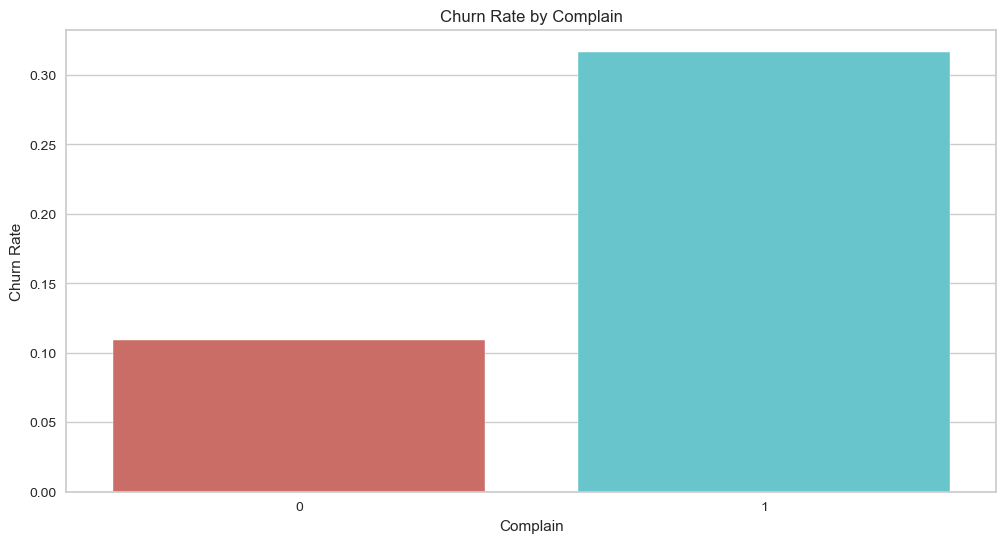

In [65]:
for var in discrete_vars:
    # Calculate churn rate for each category of the variable
    churn_rate = data_copy.groupby(var)['Churn'].mean()
    
    # Plot churn rate
    plt.figure(figsize=(12,6))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="hls")
    plt.title(f'Churn Rate by {var}')
    plt.xlabel(var)
    plt.ylabel('Churn Rate')
    plt.show()

In [66]:
continuous_vars

['Tenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

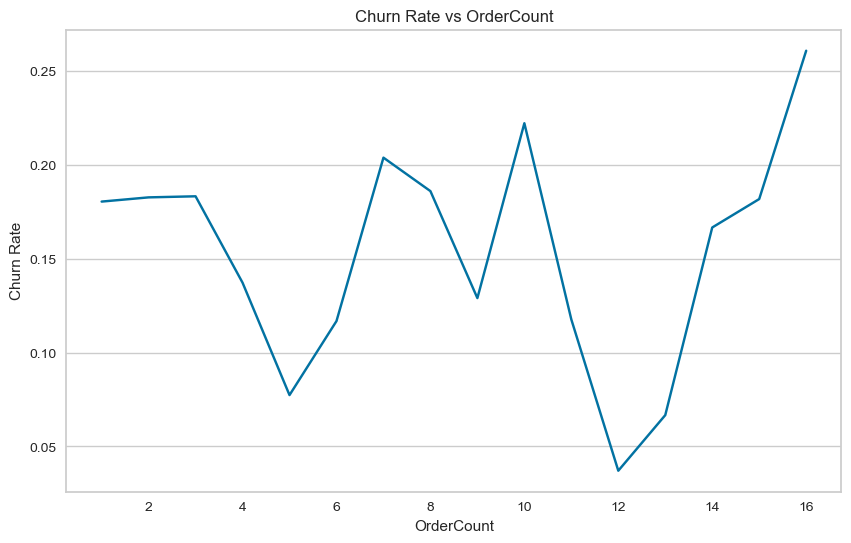

In [72]:
# Compute churn rate for each tenure
churn_rate_whtohome = data_copy.groupby('OrderCount')['Churn'].mean().reset_index()

# Create plot
plt.figure(figsize=(10,6))
plt.grid(axis='x')
sns.lineplot(x='OrderCount', y='Churn', data=churn_rate_whtohome, markers="X")
plt.title('Churn Rate vs OrderCount')
plt.ylabel('Churn Rate')
plt.xlabel('OrderCount')
# plt.xticks(ticks=data_copy.Tenure.dropna().values, fontsize=12)
plt.show()

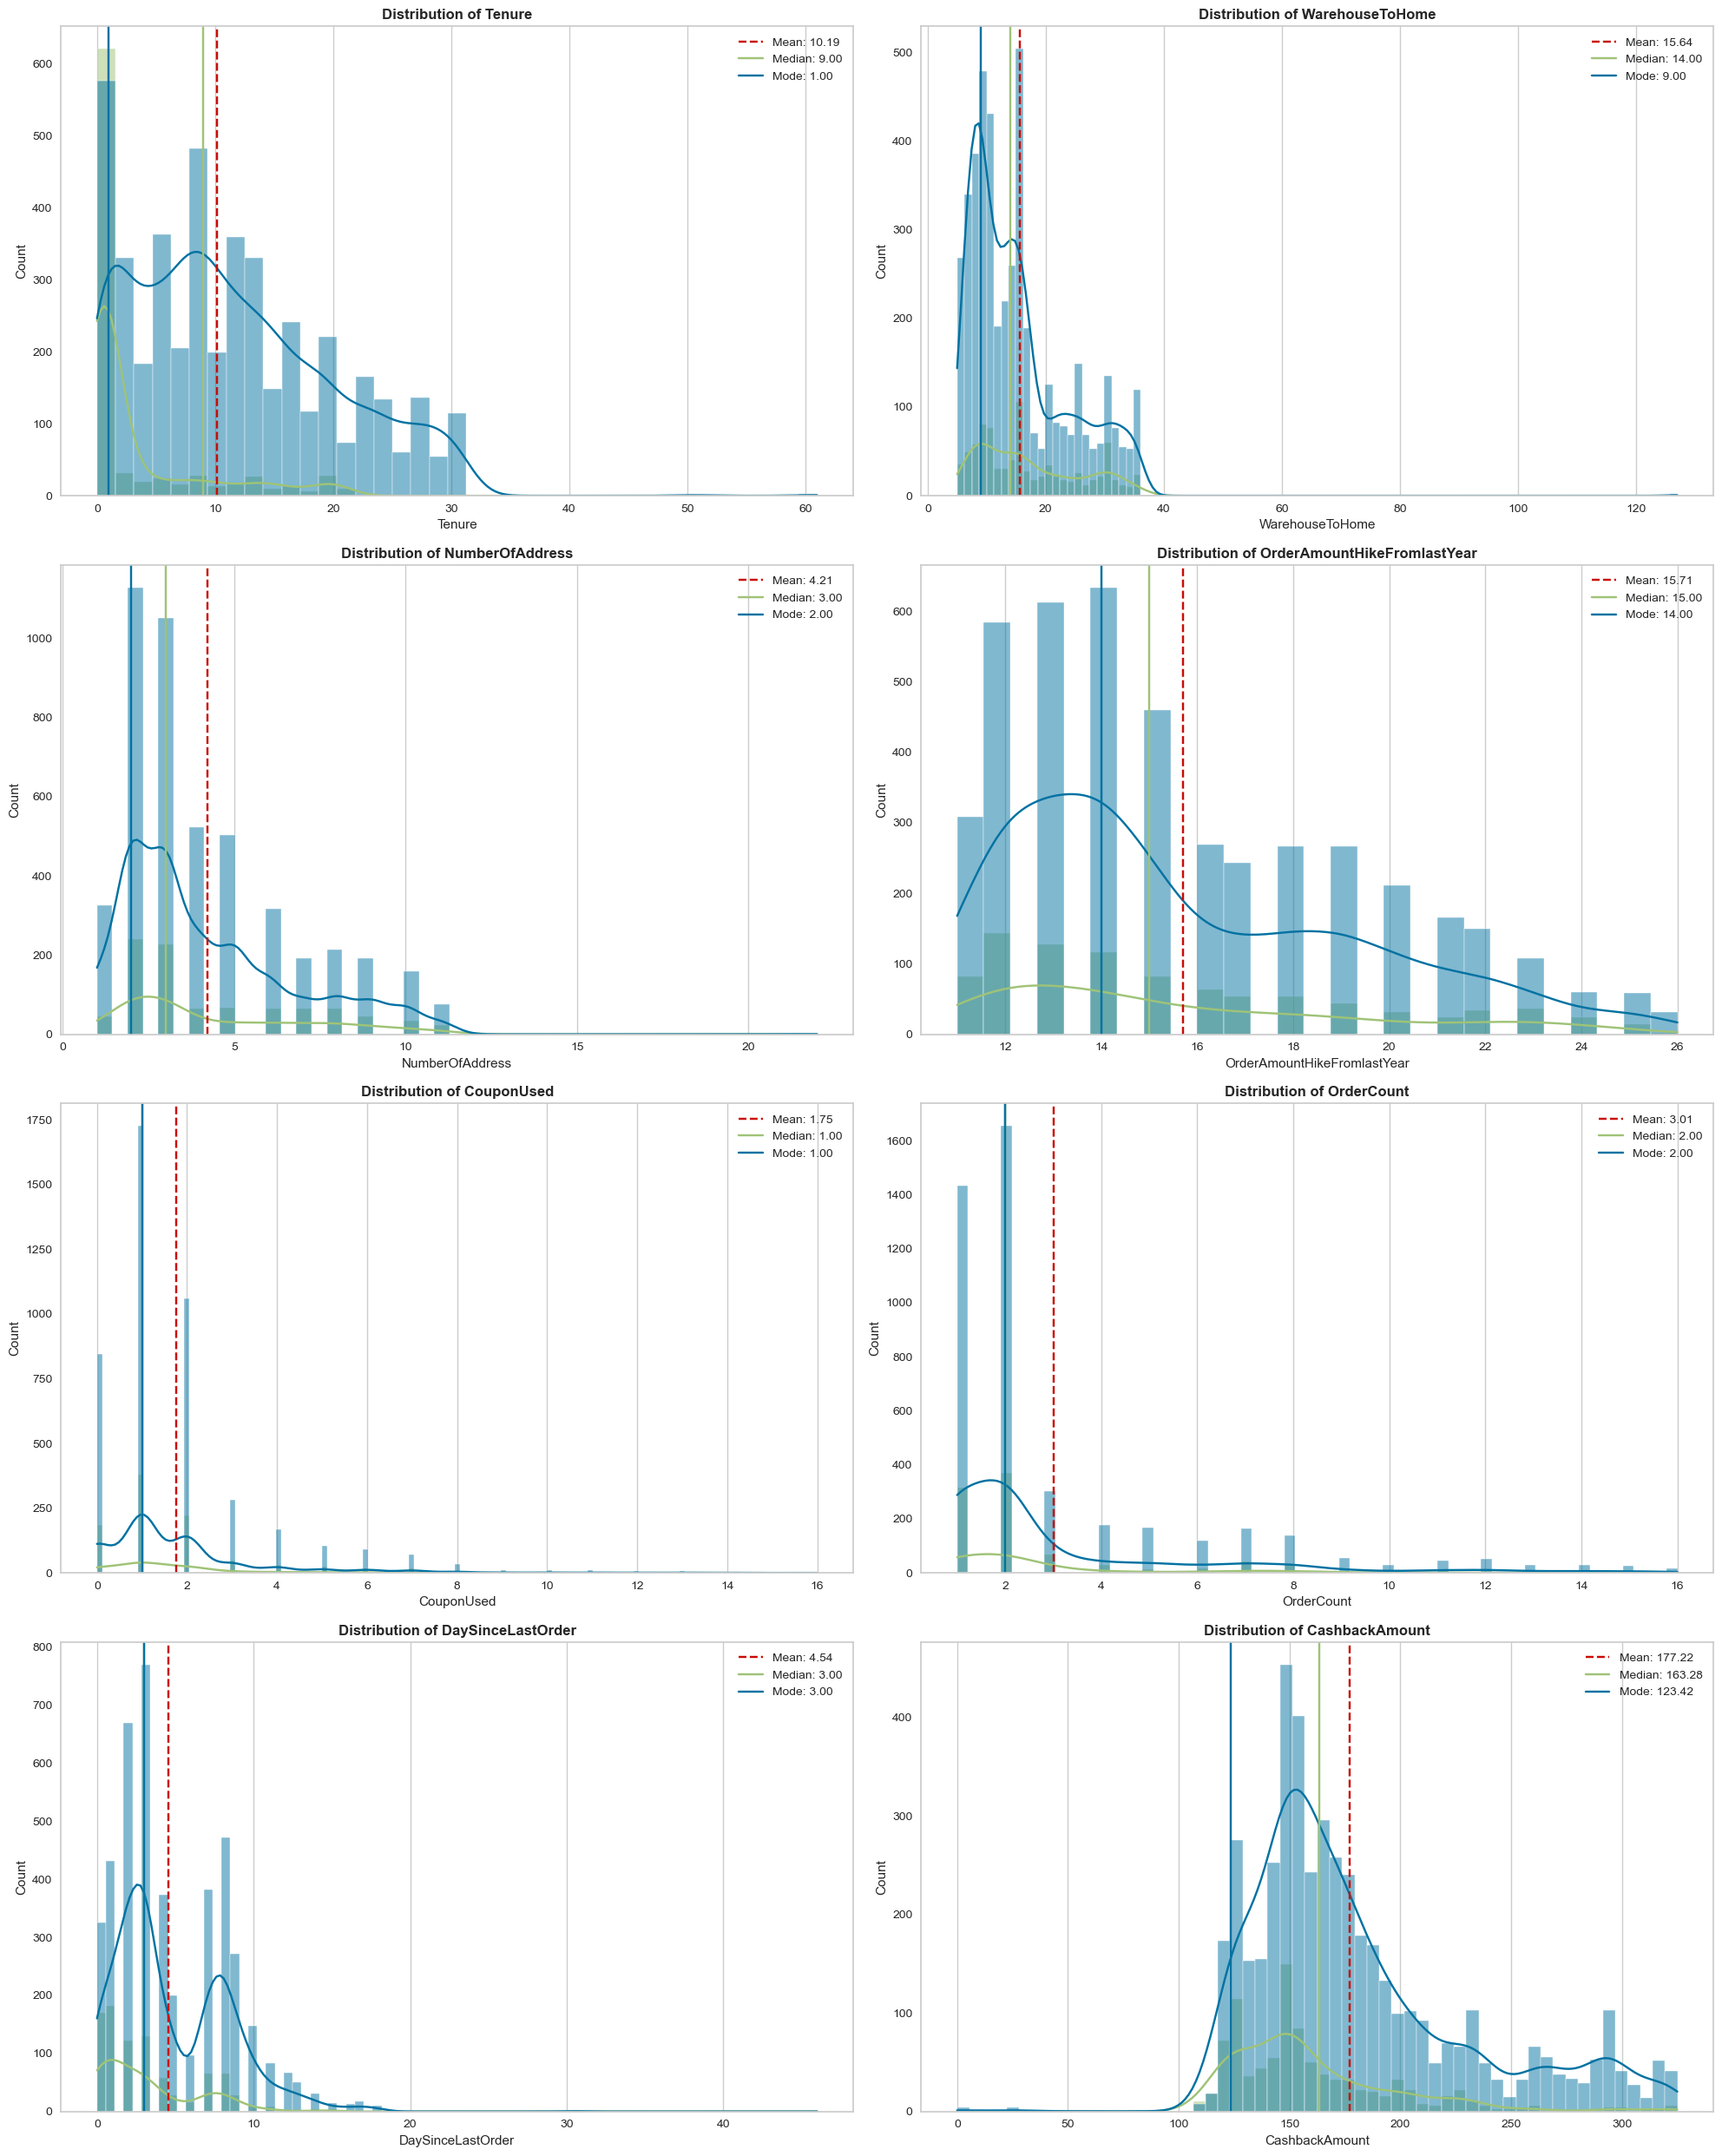

In [59]:
# Set the number of rows and columns in the subplot grid
nrows = 4
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Set the color palette
palette = sns.color_palette("husl", len(continuous_vars))

# Iterate over the columns and plot a histplot for each column
# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(continuous_vars):
    sns.histplot(data=data_copy, x=col, ax=axs[i], color=palette[i] ,kde=True, hue="Churn")

    # Set the title of the subplot
    axs[i].set_title(f'Distribution of {col}', fontweight='bold')
    
    # Add grid
    axs[i].grid(axis='y')

    # Calculate mean, median, mode and standard deviation
    mu = data_copy[col].mean()
    median = data_copy[col].median()
    mode = data_copy[col].mode().get(0, np.nan)
    sigma = data_copy[col].std()

    # Add vertical lines for mean, median and mode
    axs[i].axvline(mu, color='r', linestyle='--', label=f'Mean: {mu:.2f}')
    axs[i].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    axs[i].axvline(mode, color='b', linestyle='-', label=f'Mode: {mode:.2f}')

    # Create custom legends
#     legend_custom = [Line2D([0], [0], color='r', lw=2, label=f'Mean: {mu:.2f}'),
#                      Line2D([0], [0], color='g', lw=2, label=f'Median: {median:.2f}'),
#                      Line2D([0], [0], color='b', lw=2, label=f'Mode: {mode:.2f}'),
#                      Patch(facecolor=palette[i], edgecolor=palette[i], label=f'Distribution: {col}')]

    # Add legend
    axs[i].legend(loc="best")
#     axs[i].legend(handles=legend_custom)

# Remove empty subplots
for ax in axs[len(continuous_vars):]:
    ax.remove()

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

# Build Model using PyCaret

In [ ]:
data.columns

In [ ]:
s = setup(data, target = 'Churn', ignore_features = ['customerID'])

In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

FN = jawab salah aslinya bener
FP = jawab benar aslinya salah



In [ ]:
# tune best model
tuned_best_model = tune_model(best_model)

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [ ]:
s = setup(data, target = 'Churn', ignore_features = ['customerID'], fix_imbalance=True)

In [ ]:
# compare all models
best_model = compare_models(sort='F1')

In [ ]:
# tune best model
tuned_best_model = tune_model(best_model)

In [ ]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

In [ ]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

## Recommended Setup

In [ ]:
s = setup(data, target = 'Churn', ignore_features = ['customerID'], fix_imbalance=True, 
          fold=10, numeric_imputation="knn",normalize=True, transformation=True, remove_multicollinearity=True, 
          multicollinearity_threshold=0.9)

In [ ]:
# compare all models
best_model = compare_models(sort='F1')

In [ ]:
df = data

In [ ]:
# Average coupons used per order
df['avg_coupons_per_order'] = df['CouponUsed'] / df['OrderCount']

# Average cashback per order
df['avg_cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']

# Average spend time per device
df['avg_time_per_device'] = df['HourSpendOnApp'] / df['NumberOfDeviceRegistered']

# # Address added per month
# df['address_added_per_month'] = df['NumberOfAddress'] / df['Tenure']

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.drop(["Churn", "CustomerID"], axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
s = setup(df, target = 'Churn', ignore_features = ['customerID'], fix_imbalance=True, 
          fold=10,normalize=True, transformation=True, remove_multicollinearity=True, 
          multicollinearity_threshold=0.9, )

In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

In [ ]:
best_model

In [ ]:
# tune best model
tuned_best_model = tune_model(best_model)

In [ ]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')